In [1]:
import threadpoolctl
import time
import os
from multiprocessing import Pool

import pandas as pd
import numpy as np

import seaborn as sns
from statsmodels.sandbox.stats.multicomp import multipletests

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches

from CBModellingFuncs import *

import cobra
cobra_config = cobra.Configuration()
cobra_config.solver = "cplex"
cobra_config.tolerance = 1e-6


#### Important - define number of processes
processes = 50
####

threadpoolctl.threadpool_limits(limits=processes)
os.makedirs("../results/dataframes/sampling", exist_ok=True)

In [2]:
model, m_warnings = cobra.io.validate_sbml_model("../results/iMT1026-NZ.xml")

rgdict = {}
for g in model.groups:
    for r in g.members:
        
        rgdict[r.id] = g.id.title()

SBML errors in validation, check error log for details.
COBRA errors in validation, check error log for details.
COBRA warnings in validation, check error log for details.


In [3]:
DRinfo = pd.read_csv(f"../results/dataframes/cultivation_data/DerivedRetentInfo.csv", index_col=0, header=[0,1])
IRinfo = pd.read_csv(f"../results/dataframes/cultivation_data/InterpolatedRetentInfo.csv", index_col=0, header=[0,1])
FRinfo = pd.read_csv(f"../results/dataframes/cultivation_data/FittedRetentInfo.csv", index_col=0, header=[0,1])

NGAMseries = pd.read_csv('../results/dataframes/NGAMseries.csv',index_col=0,squeeze=True)

model_viab_cols = ["Growth Rate model 1/h", "qS model mmol/gh","qP model g/gh", "qCO2 viable model mmol/gh", "qO2 viable model mmol/gh", "qStorGlyc mmol/gh"]
viab_cols = ["Average Growth Rate 1/h", "qS viable mmol/gh","qP g/gh", "qCO2 viable mmol/gh", "qO2 viable mmol/gh", "qStorGlyc mmol/gh"] 

sp_gr = {'C0.1': '0.1',
         '0.0': '0.025',
         '0.9': '0.013',
         '1.9': '0.0073',
         '5.9': '0.0022',
         '7.9': '0.0017',
         '9.9': '0.0014',
         '13.9': '0.001',
         '16.9': '0.00083',
         '19.9': '0.00071',
         '23.9': '0.00059',
         '27.9': '0.00052'}

## Sampling

Generate chains for each different biomass equation at each different point during the retentostat cultivation

In [4]:
co2=True
optthin = 1000
o2 = True
n_chains = 4

- Uncomment the below cell to execute and generate all sampled chains

In [5]:
# %%time

# sampling_results = []
# all_fva = []

# equation_names = ["Consensus", "Derived", "Interpolated", "Fitted","ScaledConsensus"]
# datasets = [DRinfo, DRinfo, IRinfo, FRinfo, DRinfo]


# for i, equation in enumerate(equation_names):
#     data = datasets[i].loc[:, model_viab_cols].copy()

#     for name, values in data.iterrows():
        
#         loop_start = time.time()
#         print(name)
#         mu = values[0]
#         sd = values[1]

#         with model as temp_model:
#             set_biomass_objective(temp_model, equation, name)
#             print(f"{equation} - {name}")
            
#             temp_model.reactions.ATPM.bounds = (NGAMseries[f"{equation}"],1000)
            
 
#             solution = constrain_predict(temp_model, values, co2=co2, o2=o2)
#             pred_mu = solution.objective_value

#             if equation in ["Consensus", "ScaledConsensus"]:
#                 temp_model.reactions.get_by_id(equation).bounds =  (pred_mu*0.95, pred_mu)
                
#             else:
#                 temp_model.reactions.get_by_id(f"{equation}Biomass{name}").bounds = (pred_mu*0.95, pred_mu) 
               
#             flux_span = constrain_predict(temp_model, values, co2=co2, fluxva=True, processes=processes,fopt=0)
#             remove_blocked(temp_model, flux_span, solution)


#             fva_frame = flux_span.stack(0).to_frame().T
#             fva_frame["Equation"] = equation
#             fva_frame["Time"] = name
#             fva_frame.set_index(["Equation", "Time"], inplace=True)
#             all_fva.append(fva_frame)
            
#             chains = constrain_predict(temp_model, values, sampling=True, chains=n_chains, thinning=optthin, 
#                                        loopless=True, processes=processes, co2=co2, o2=o2, n_samples=1250)#5000)

#                  # ensure all have same number of samples, may have
#             chains = [df.iloc[:min([df.shape[0] for df in chains]), :] for df in chains]
#             print(f"{equation} chains with all have length of {chains[0].shape[0]}") 

#             for j, chain in enumerate(chains):
            
#                 chain["Chain"] = j+1
#             chains = pd.concat(chains, ignore_index=True)
#             chains.to_pickle(f"../results/sampling/{equation}_{name}_T{optthin}.pkl.gz", 
#                                 compression={'method': 'gzip', 'compresslevel': 6, 'mtime': 1})

#             now = time.time()
#             print(f"It has been {(now - loop_start)/60} minutes since the {name} sampling point loop started")
# ####

# all_fva = pd.concat(all_fva)
# gr_values = all_fva.index.get_level_values(1).to_series().apply(lambda x: sp_gr[x]).values
# gr_values = pd.Series(gr_values.astype(float), name="Growth Rate")
# all_fva.set_index(gr_values, append=True, inplace=True)
# all_fva.to_csv(f"../results/dataframes/fluxes/FVA_ranges.csv")

C0.1
Consensus - C0.1
2387 reactions before making consistent, 1425 after
Consensus chains with all have length of 1250
It has been 3.0823768695195515 minutes since the C0.1 sampling point loop started
0.0
Consensus - 0.0
2387 reactions before making consistent, 1452 after
Consensus chains with all have length of 1250
It has been 3.20819175640742 minutes since the 0.0 sampling point loop started
0.9
Consensus - 0.9
2387 reactions before making consistent, 1443 after
Consensus chains with all have length of 1250
It has been 3.1669670065244038 minutes since the 0.9 sampling point loop started
1.9
Consensus - 1.9
2387 reactions before making consistent, 1456 after
Consensus chains with all have length of 1250
It has been 3.2217330892880756 minutes since the 1.9 sampling point loop started
5.9
Consensus - 5.9
2387 reactions before making consistent, 1438 after
Consensus chains with all have length of 1250
It has been 3.1876696507136026 minutes since the 5.9 sampling point loop started
7.9


# Analysis of sampled chains

## Convergence check

In [6]:
%%time
all_stats = pd.DataFrame()


equation_names = ["Consensus", "Derived", "Interpolated", "Fitted","ScaledConsensus"]
datasets = [DRinfo, DRinfo, IRinfo, FRinfo, DRinfo]

n_chains = 4

for i, equation in enumerate(equation_names):
    data = datasets[i].loc[:, model_viab_cols].copy()
    all_df = []

    for name, values in data.iterrows():
        
        
        chains = pd.read_pickle(f"../results/sampling/{equation}_{name}_T{optthin}.pkl.gz") 
        chains = [chains.set_index("Chain").loc[j+1].reset_index(drop=True) for j in range(n_chains)]
        

        grouped, rxns = extractchains(chains)
        
        for_pool = list(zip(grouped,rxns))
        pool = Pool(processes=processes)
        all_series = pool.starmap(calculateDiagnostics, for_pool)
        pool.close()
        df = pd.concat(all_series,axis=1).T
        df["Equation"] = name
        
        all_df.append(df)
    all_df = pd.concat(all_df, ignore_index=True)
    all_df["Method"] = equation
    
    all_stats = pd.concat([all_stats, all_df], ignore_index=True)
      
n_grouped_chains = all_stats.groupby(["Method", "Equation"]).count()["Rxn"]

all_stats.set_index(["Method", "Equation", "Rxn"], inplace=True)
all_stats["Rhat Fails"] = all_stats["Rhat"] > 1.01
all_stats["ESS-Bulk Fails"] = all_stats["ESS-Bulk"] < 400


summary_stats = all_stats.copy() #all_stats[["Geweke Fails","ESS Split Fails", "Rhat Fails", "ESS-Bulk Fails"]]
summary_stats.index = summary_stats.index.reorder_levels(["Rxn", "Method", "Equation"])#-1,0,1])

chain_summary = (summary_stats > 0).groupby(["Method", "Equation"]).sum()
# chain_summary = chain_summary[["Geweke Fails","ESS Split Fails", "Rhat Fails", "ESS-Bulk Fails"]]
chain_summary = chain_summary[["Geweke Fails","Rhat Fails", "ESS-Bulk Fails"]]
temp_df = (chain_summary.divide(n_grouped_chains, axis=0) * 100)

# temp_df.columns=["% Geweke Fails","% seperated-ESS Fails","% Rhat Fails","% bulk-ESS Fails"]
temp_df.columns=["% Geweke Fails","% Rhat Fails","% bulk-ESS Fails"]

chain_summary = pd.concat([chain_summary,temp_df],axis=1)
chain_summary.to_csv(f"../results/dataframes/sampling/Sampling_DiagnosticsChains.csv")

n_method_samples = len(summary_stats.index.droplevel("Rxn").unique())

rxn_summary = summary_stats.copy()

# rxn_summary = rxn_summary[rxn_summary.loc[:,["ESS Split Fails","Rhat Fails", "ESS-Bulk Fails"]].sum(axis=1) > 0]
rxn_summary = rxn_summary[rxn_summary.loc[:,["Rhat Fails", "ESS-Bulk Fails"]].sum(axis=1) > 0]
rxn_summary.to_csv(f"../results/dataframes/sampling/Sampling_DiagnosticsReactions.csv")

CPU times: user 45.9 s, sys: 2min 51s, total: 3min 37s
Wall time: 4min 3s


In [7]:
rxn_summary

Geweke Fails      Rhat    ESS-Bulk  \
Rxn           Method          Equation                                      
CO2t          Consensus       C0.1                4  1.054097  883.864791   
Ex_co2        Consensus       C0.1                4  1.054097  883.864791   
NADPPPS       Consensus       0.0                 4   1.01407  622.242414   
ACONTm        Consensus       0.0                 4  1.012435  666.895653   
NADK          Consensus       0.0                 4  1.014035  623.046486   
...                                             ...       ...         ...   
PI4P5K_PP     ScaledConsensus 23.9                0  1.023895   227.47804   
SK_glycogen_c ScaledConsensus 23.9                2  1.430431    8.381283   
GLCt1         ScaledConsensus 27.9                1  1.235725   13.499168   
HEX1          ScaledConsensus 27.9                1  1.233269   13.615685   
Ex_glc_D      ScaledConsensus 27.9                1  1.235725   13.499168   

                                           ESS-Tail  Rhat Fails  \
Rxn           Method          Equation                            
CO2t          Consensus       C0.1      1047.111109        True   
Ex_co2        Consensus       C0.1      1039.011912        True   
NADPPPS       Consensus       0.0       1007.976768        True   
ACONTm        Consensus       0.0        685.643176        True   
NADK          Consensus       0.0       1004.485207        True   
...                                             ...         ...   
PI4P5K_PP     ScaledConsensus 23.9      2494.044671        True   
SK_glycogen_c ScaledConsensus 23.9        59.289819        True   
GLCt1         ScaledConsensus 27.9       220.037734        True   
HEX1          ScaledConsensus 27.9       186.978129        True   
Ex_glc_D      ScaledConsensus 27.9       350.423491        True   

                                        ESS-Bulk Fails  
Rxn           Method          Equation                  
CO2t          Consensus       C0.1               False  
Ex_co2        Consensus       C0.1               False  
NADPPPS       Consensus       0.0                False  
ACONTm        Consensus       0.0                False  
NADK          Consensus       0.0                False  
...                                                ...  
PI4P5K_PP     ScaledConsensus 23.9                True  
SK_glycogen_c ScaledConsensus 23.9                True  
GLCt1         ScaledConsensus 27.9                True  
HEX1          ScaledConsensus 27.9                True  
Ex_glc_D      ScaledConsensus 27.9                True  

[950 rows x 6 columns]

In [8]:
roi = ["G6PDH2","PGI","PYK","MDHm","CSm","AKGMALtm","NADH2_u6cm","NADH2_u6mh","CYOR_u6m","CYOOm","ATPS3m","ATPM"]
if (rxn_summary.index.get_level_values("Rxn").isin(roi)).any():
    output = rxn_summary.loc[roi]
    output.to_csv(f"../results/dataframes/sampling/Sampling_FailedReactionsOfInterest.csv")
else:
    output = "No reactions of interest failed to converge"
    
output

Geweke Fails      Rhat     ESS-Bulk  \
Rxn        Method          Equation                                       
PYK        ScaledConsensus 9.9                 1   1.01522  1371.886459   
MDHm       Derived         9.9                 0  1.012373  2532.311734   
CSm        ScaledConsensus 9.9                 1  1.015458  1318.086447   
AKGMALtm   Derived         9.9                 0  1.012412  2605.689983   
NADH2_u6cm Derived         9.9                 0  1.011964  2973.198877   
NADH2_u6mh Derived         9.9                 0  1.011471  3628.869708   
CYOR_u6m   Derived         9.9                 0  1.012519  3466.863765   
CYOOm      Derived         9.9                 0  1.012519  3466.853794   

                                        ESS-Tail  Rhat Fails  ESS-Bulk Fails  
Rxn        Method          Equation                                           
PYK        ScaledConsensus 9.9       2934.521212        True           False  
MDHm       Derived         9.9       1677.914315        True           False  
CSm        ScaledConsensus 9.9       2875.852537        True           False  
AKGMALtm   Derived         9.9       1887.089851        True           False  
NADH2_u6cm Derived         9.9       1921.343174        True           False  
NADH2_u6mh Derived         9.9       2092.254848        True           False  
CYOR_u6m   Derived         9.9        934.924074        True           False  
CYOOm      Derived         9.9        934.924074        True           False

In [9]:
chain_summary

Geweke Fails  Rhat Fails  ESS-Bulk Fails  \
Method          Equation                                             
Consensus       0.0                668           4               0   
                0.9                168           1               0   
                1.9                409          25              19   
                13.9               455           5               4   
                16.9               517           5               5   
                19.9               271          22               2   
                23.9               218          11               4   
                27.9               193          22               3   
                5.9                222           3               3   
                7.9                372          11               3   
                9.9                360          16               3   
                C0.1               313           2               0   
Derived         0.0                376          52              17   
                0.9                339           0               0   
                1.9                298           2               0   
                13.9               382           5               5   
                16.9               157           5               5   
                19.9               300          21               4   
                23.9               339           5               2   
                27.9               376           1               0   
                5.9                247           3               3   
                7.9                268           3               3   
                9.9                351         304               5   
                C0.1               455           6               1   
Fitted          0.0                711           4               2   
                0.9                223           0               0   
                1.9                440          16               0   
                13.9               418           7               3   
                16.9               334          16              10   
                19.9               335          17              14   
                23.9               307           3               3   
                27.9               271           3               3   
                5.9                199           3               3   
                7.9                370           3               3   
                9.9                398           3               3   
                C0.1               363           0               0   
Interpolated    0.0                571           1               0   
                0.9                187          41               1   
                1.9                366           0               0   
                13.9               338          11               7   
                16.9               309          16               3   
                19.9               337          33              12   
                23.9               430           0               0   
                27.9               297           0               0   
                5.9                232           4               3   
                7.9                392          10               9   
                9.9                247           9               5   
                C0.1               446          12               0   
ScaledConsensus 0.0                500           0               0   
                0.9                366          38               7   
                1.9                259          12               0   
                13.9               403           4               4   
                16.9               436          22              11   
                19.9               365           5               5   
                23.9               216           7               7   
                27.9               3

## Analysis of flux distributions

##### Import all flux prediction results
##### Calculate flux yields
##### Calculate quantiles of the sampling results

In [10]:
all_pfba = pd.read_csv("../results/dataframes/fluxes/AllpFBA_results.csv", header=[0,1], index_col=0)
all_pfba = all_pfba.T 

gr_values = all_pfba.index.get_level_values(1).to_series().apply(lambda x:sp_gr[x])
gr_values.name = "Growth Rate"

all_pfba.set_index(gr_values,append=True, inplace=True)

norm_pfba = all_pfba.div(all_pfba["Ex_glc_D"].abs(),axis=0)
norm_pfba.sort_index(inplace=True)

all_fva = pd.read_csv(f"../results/dataframes/fluxes/FVA_ranges.csv",header=[0,1],index_col=[0,1,2])
norm_fva = all_fva.div(all_fva["Ex_glc_D"].abs().mean(axis=1),axis=0)

In [11]:
%%time
import re
all_chains = []


equation_names = ["Consensus", "Derived", "Interpolated", "Fitted","ScaledConsensus"]
datasets = [DRinfo, DRinfo, IRinfo, FRinfo, DRinfo]

for i, equation in enumerate(equation_names):
    data = datasets[i].loc[:, model_viab_cols].copy()
    all_df = []

    for name, values in data.iterrows():
        
        chains = pd.read_pickle(f"../results/sampling/{equation}_{name}_T{optthin}.pkl.gz") 
        merged = chains.drop(columns="Chain")
        chains = [chains.set_index("Chain").loc[j+1].reset_index(drop=True) for j in range(n_chains)]
        
        mask = pd.concat([(chain == 0).all(axis=0) for chain in chains],axis=1).any(axis=1)
        
        merged = merged.loc[:,~mask]
        # remove any samples with very high fluxes
        merged = merged[(merged != 1000).all(axis=1)]
        
        merged["Equation"] = equation
        merged["Time"] = name
        
        all_chains.append(merged)

all_chains_df = pd.concat(all_chains).fillna(0)
all_chains_df.reset_index(inplace=True)
all_chains_df.rename(columns={"index":"Chain"},inplace=True)
all_chains_df["Growth Rate"] = all_chains_df.Time.apply(lambda x: sp_gr[x])
all_chains_df.set_index(["Equation", "Time", "Chain", "Growth Rate"],inplace=True)
all_chains_df = all_chains_df.sort_index(level=-1, ascending=False)
all_chains_df.to_pickle(f"../results/dataframes/fluxes/AllChains.pkl.gz", compression={'method': 'gzip', 'compresslevel': 6, 'mtime': 1})

quants = all_chains_df.groupby(["Equation", "Time", "Growth Rate"]).quantile([0.025, 0.975]) # [0.0125, 0.9875])
quants = quants.unstack().sort_index(level=["Equation","Growth Rate"],ascending=False)

# Normalise all samples to their glucose uptake rate
norm_chains_df = all_chains_df.div(all_chains_df["Ex_glc_D"].abs(), axis=0)
norm_chains_df.to_pickle(f"../results/dataframes/fluxes/NormChains.pkl.gz", compression={'method': 'gzip', 'compresslevel': 6, 'mtime': 1})

# Calculate the quantiles
norm_quants = norm_chains_df.groupby(["Equation", "Time", "Growth Rate"]).quantile([0.025, 0.975]) # [0.0125, 0.9875])
norm_quants = norm_quants.unstack().sort_index(level=["Equation","Growth Rate"],ascending=False)
norm_quants.to_csv(f"../results/dataframes/fluxes/95%CIFluxRatios.csv") 
norm_quants.loc[:, ["G6PDH2", "PGI","PGMT", "TRE6PS", "PFK", 
               "PYK", "PC", "PDHa1", "CSm", "ASPTA",
               "ASPTAm",  "AKGMALtm", "ASPGLU2m",
               "MDH", "MDHm","ME1m" , "Ex_nh4"]].to_csv(f"../results/dataframes/fluxes/95%CIFluxRatiosInteresting.csv")

CPU times: user 5min 47s, sys: 9.45 s, total: 5min 56s
Wall time: 5min 54s


##### Calculate the production fluxes of cofactors

In [12]:
%%time 

interested_cofactors = ['atp_c', 'nadh_c', 'nadph_c', 'atp_m', 'nadh_m', 'nadph_m',
                      'atp_x', 'nadh_x', 'nadph_x']

sm = cobra.util.array.create_stoichiometric_matrix(model, array_type='DataFrame', dtype=None)

# Calculate total cofactor production, as well as what proportion of the supply comes from which pathway

cofactors_total_supply, cof_rxn_supply = calculate_cofactors(all_chains_df,interested_cofactors,sm, source=True)
cofactors_total_supply = cofactors_total_supply.loc[:,(cofactors_total_supply > 0).any()]
cofactors_ranges = cofactors_total_supply.groupby(["Equation", "Growth Rate"]).quantile([0.025, 0.975]) # 0.0125, 0.9875])
cofactors_ranges = cofactors_ranges.T.stack([0,2])
cofactors_ranges = cofactors_ranges.sort_index(axis=1,ascending=False)
cofactors_ranges.to_csv(f"../results/dataframes/fluxes/TotalCofactorRanges.csv")

cof_rxn_supply2 = cof_rxn_supply.loc[(~cof_rxn_supply.isna().all(axis=1)),
                                        (~cof_rxn_supply.isna().all())]
cof_rxn_supply2 = cof_rxn_supply2.loc[:,(cof_rxn_supply2 > 1e-6).any()]
subsystem_supply = cof_rxn_supply2.rename(columns=rgdict)
subsystem_supply = subsystem_supply.groupby(subsystem_supply.columns,axis=1).sum()
subsystem_supply = subsystem_supply.T.stack(0)
subsystem_supply = subsystem_supply[subsystem_supply.sum(axis=1) > 0]

# # calculate what proportion of each cofactors is from pathways
subsystem_supply = subsystem_supply.unstack(1)
subsystem_supply = subsystem_supply.div(subsystem_supply.T.sum(axis=1))
subsystem_supply = subsystem_supply.T.droplevel("Time")
subsystem_supply = subsystem_supply.unstack("Growth Rate").stack(0)
subsystem_supply = subsystem_supply.reorder_levels([1,0,-1]).sort_index()
subsystem_supply = subsystem_supply.round(3)*100
subsystem_supply = subsystem_supply.loc[~(subsystem_supply == 0).all(axis=1).groupby(level=[0,1,2]).any(0),:]
subsystem_supply.to_csv("../results/dataframes/fluxes/MajorCofactorsProductionBySubsystems.csv")

cofactors_norm_total_supply = calculate_cofactors(norm_chains_df,interested_cofactors,sm)
cofactors_norm_total_supply = cofactors_norm_total_supply.loc[:,(cofactors_norm_total_supply > 0).any()]
cofactors_norm_ranges = cofactors_norm_total_supply.groupby(["Equation", "Growth Rate"]).quantile([0.025, 0.975]) # 0.0125, 0.9875])
cofactors_norm_ranges = cofactors_norm_ranges.T.stack([0,2])
cofactors_norm_ranges = cofactors_norm_ranges.sort_index(axis=1,ascending=False)
cofactors_norm_ranges.to_csv(f"../results/dataframes/fluxes/NormalisedCofactorRanges.csv")


CPU times: user 1min 18s, sys: 29.5 s, total: 1min 48s
Wall time: 1min 48s


##### Calculate proportion of pFBA results within 95% confidence interval

In [13]:
equation_names =  ["Consensus","Derived", "Fitted", "Interpolated", "ScaledConsensus"]

col_mask = norm_quants.columns.get_level_values(0).unique()
col_mask = col_mask.drop(["growth"]) #, "GAME", "GAM"])

masked_npfba = norm_pfba.loc[equation_names,col_mask].copy()


poplo = np.zeros(masked_npfba.shape)

poplo=pd.DataFrame(0,
                   index=masked_npfba.index,
                   columns=masked_npfba.columns)

for i, row in masked_npfba.iterrows():
    nans = row[row.isna()]
    poplo.loc[i, nans.index] = 2
    temp_row = row[row.notna()]
    poplo.loc[i, temp_row.index] = (temp_row >= norm_quants.loc[i, temp_row.index].unstack()[0.025])&(temp_row <= norm_quants.loc[i, temp_row.index].unstack()[0.975])

    

print(f"{round(100* ((poplo == True).sum(axis=1)/ ((poplo == True).sum(axis=1)+(poplo == False).sum(axis=1))).mean(),2)}% pFBA results within 95% CI")

proportion = ((poplo == True).sum(axis=0)/(poplo != 2).sum(axis=0))*100
proportion = proportion.rename(rgdict)
proportion = proportion.reset_index().rename(columns={"index":"Subsystem",0:"Proportion"})

# Count how many members in each group
count_prop = proportion.groupby(by=["Subsystem"]).count()
# if only 3 members or less of subsystem, drop
proportion = proportion[proportion.Subsystem.isin(count_prop.index[(count_prop > 3).values.flatten()])]
median_proportions = proportion.groupby("Subsystem").median().sort_values("Proportion",ascending=False)
median_proportions.to_csv(f"../results/dataframes/sampling/Proportions_FBA_95CI.csv")
median_proportions

/home/users/bcoltman/.conda/envs/memo3.7/lib/python3.7/site-packages/pandas/core/ops/common.py:119: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if a.name == b.name:


71.26% pFBA results within 95% CI


Proportion
Subsystem                                                     
Glutamate Metabolism                                100.000000
Transport, Golgi Apparatus                          100.000000
Methanol Metabolism                                 100.000000
Pyruvate Metabolism                                 100.000000
Glycerolipid Metabolism                             100.000000
Fructose And Mannose Metabolism                     100.000000
N-Glycan Metabolism                                 100.000000
Fatty Acid Degradation                              100.000000
Transport, Nuclear                                  100.000000
Transport, Peroxisomal                              100.000000
Transport, Vacuolar                                 100.000000
Phospholipid Metabolism                             100.000000
Nucleotide Metabolism                               100.000000
Arginine And Proline Metabolism                     100.000000
Propanoate Metabolism                               100.000000
Inositol Phosphate Metabolism                        98.333333
Oxidative Phosphorylation                            98.333333
Methionine Metabolism                                98.333333
Other Amino Acid Metabolism                          96.666667
Pyridoxine Metabolism                                95.000000
Glycine And Serine Metabolism                        90.000000
Carbohydrate Metabolism                              90.000000
Other                                                90.000000
Thiamine Metabolism                                  87.500000
Tyrosine, Tryptophan, And Phenylalanine Metabolism   85.000000
Vitamin And Cofactor Biosynthesis                    85.000000
Pentose Phosphate Pathway                            81.666667
Folate Metabolism                                    80.000000
Pantothenate And Coa Biosynthesis                    80.000000
Transport, Mitochondrial                             76.666667
Sphingolipid Metabolism                              76.666667
Glyoxylate And Dicarboxylate Metabolism              73.333333
Cysteine Metabolism                                  70.000000
Nad Biosynthesis                                     66.666667
Glycolysis/Gluconeogenesis                           66.666667
Biomass Composition                                  63.333333
Fatty Acid Biosynthesis                              63.333333
Valine, Leucine, And Isoleucine Metabolism           55.000000
Alanine And Aspartate Metabolism                     51.666667
Riboflavin Metabolism                                50.000000
Citric Acid Cycle                                    33.333333
Transport, Extracellular                             32.500000
Quinone Biosynthesis                                 23.333333
Porphyrin And Chlorophyll Metabolism                 13.333333
Transport, Er                                        10.000000
Histidine Metabolism                                 10.000000
Threonine And Lysine Metabolism                       7.500000
Exchange Reaction                                     6.666667
Sterol Metabolism                                     3.333333
Amino Sugar And Nucleotide Sugar Metabolism           3.333333

Median of sampled fluxes of PGI and G6PDH2 for each biomass equation at each growth rates

In [14]:
median_chains = norm_chains_df.reset_index().groupby(["Equation", "Growth Rate"]).median()
median_chains.to_csv(f"../results/dataframes/fluxes/MedianChains.csv")
median_chains.loc[:,["G6PDH2","PGI"]].T.stack(0)

Growth Rate              0.00052   0.00059   0.00071   0.00083     0.001  \
       Equation                                                            
G6PDH2 Consensus        0.142751  0.092712  0.113923  0.126701  0.143055   
       Derived          0.090462  0.099031  0.107836  0.114100  0.122218   
       Fitted           0.070790  0.068490  0.079512  0.083685  0.095997   
       Interpolated     0.070519  0.070311  0.075798  0.086164  0.095224   
       ScaledConsensus  0.104157  0.112142  0.130133  0.143929  0.160266   
PGI    Consensus        0.824783  0.882106  0.862132  0.841443  0.811330   
       Derived          0.833797  0.836141  0.825797  0.810604  0.787720   
       Fitted           0.866235  0.865549  0.845570  0.831288  0.806249   
       Interpolated     0.866817  0.863709  0.849486  0.828518  0.806209   
       ScaledConsensus  0.855386  0.854608  0.837843  0.816104  0.786087   

Growth Rate               0.0014    0.0017    0.0022    0.0073     0.013  \
       Equation                                                            
G6PDH2 Consensus        0.174250  0.190983  0.222816  0.341912  0.378047   
       Derived          0.131996  0.143236  0.181618  0.199844  0.216840   
       Fitted           0.110749  0.123138  0.140654  0.205547  0.228946   
       Interpolated     0.114736  0.126431  0.146187  0.208371  0.234610   
       ScaledConsensus  0.185243  0.211671  0.246210  0.368167  0.400869   
PGI    Consensus        0.757649  0.731689  0.686411  0.513325  0.463933   
       Derived          0.750635  0.722996  0.661685  0.552488  0.510082   
       Fitted           0.768969  0.741540  0.702098  0.556044  0.513580   
       Interpolated     0.764735  0.739423  0.699765  0.554081  0.512332   
       ScaledConsensus  0.738843  0.703144  0.655437  0.483969  0.438035   

Growth Rate                0.025       0.1  
       Equation                             
G6PDH2 Consensus        0.409472  0.438912  
       Derived          0.253621  0.311896  
       Fitted           0.251363  0.313567  
       Interpolated     0.248869  0.310589  
       ScaledConsensus  0.429592  0.455110  
PGI    Consensus        0.418519  0.377637  
       Derived          0.471457  0.437824  
       Fitted           0.473643  0.436138  
       Interpolated     0.476199  0.439118  
       ScaledConsensus  0.396496  0.356600

### Plotting 

##### Plot ridge plots of interested reactions

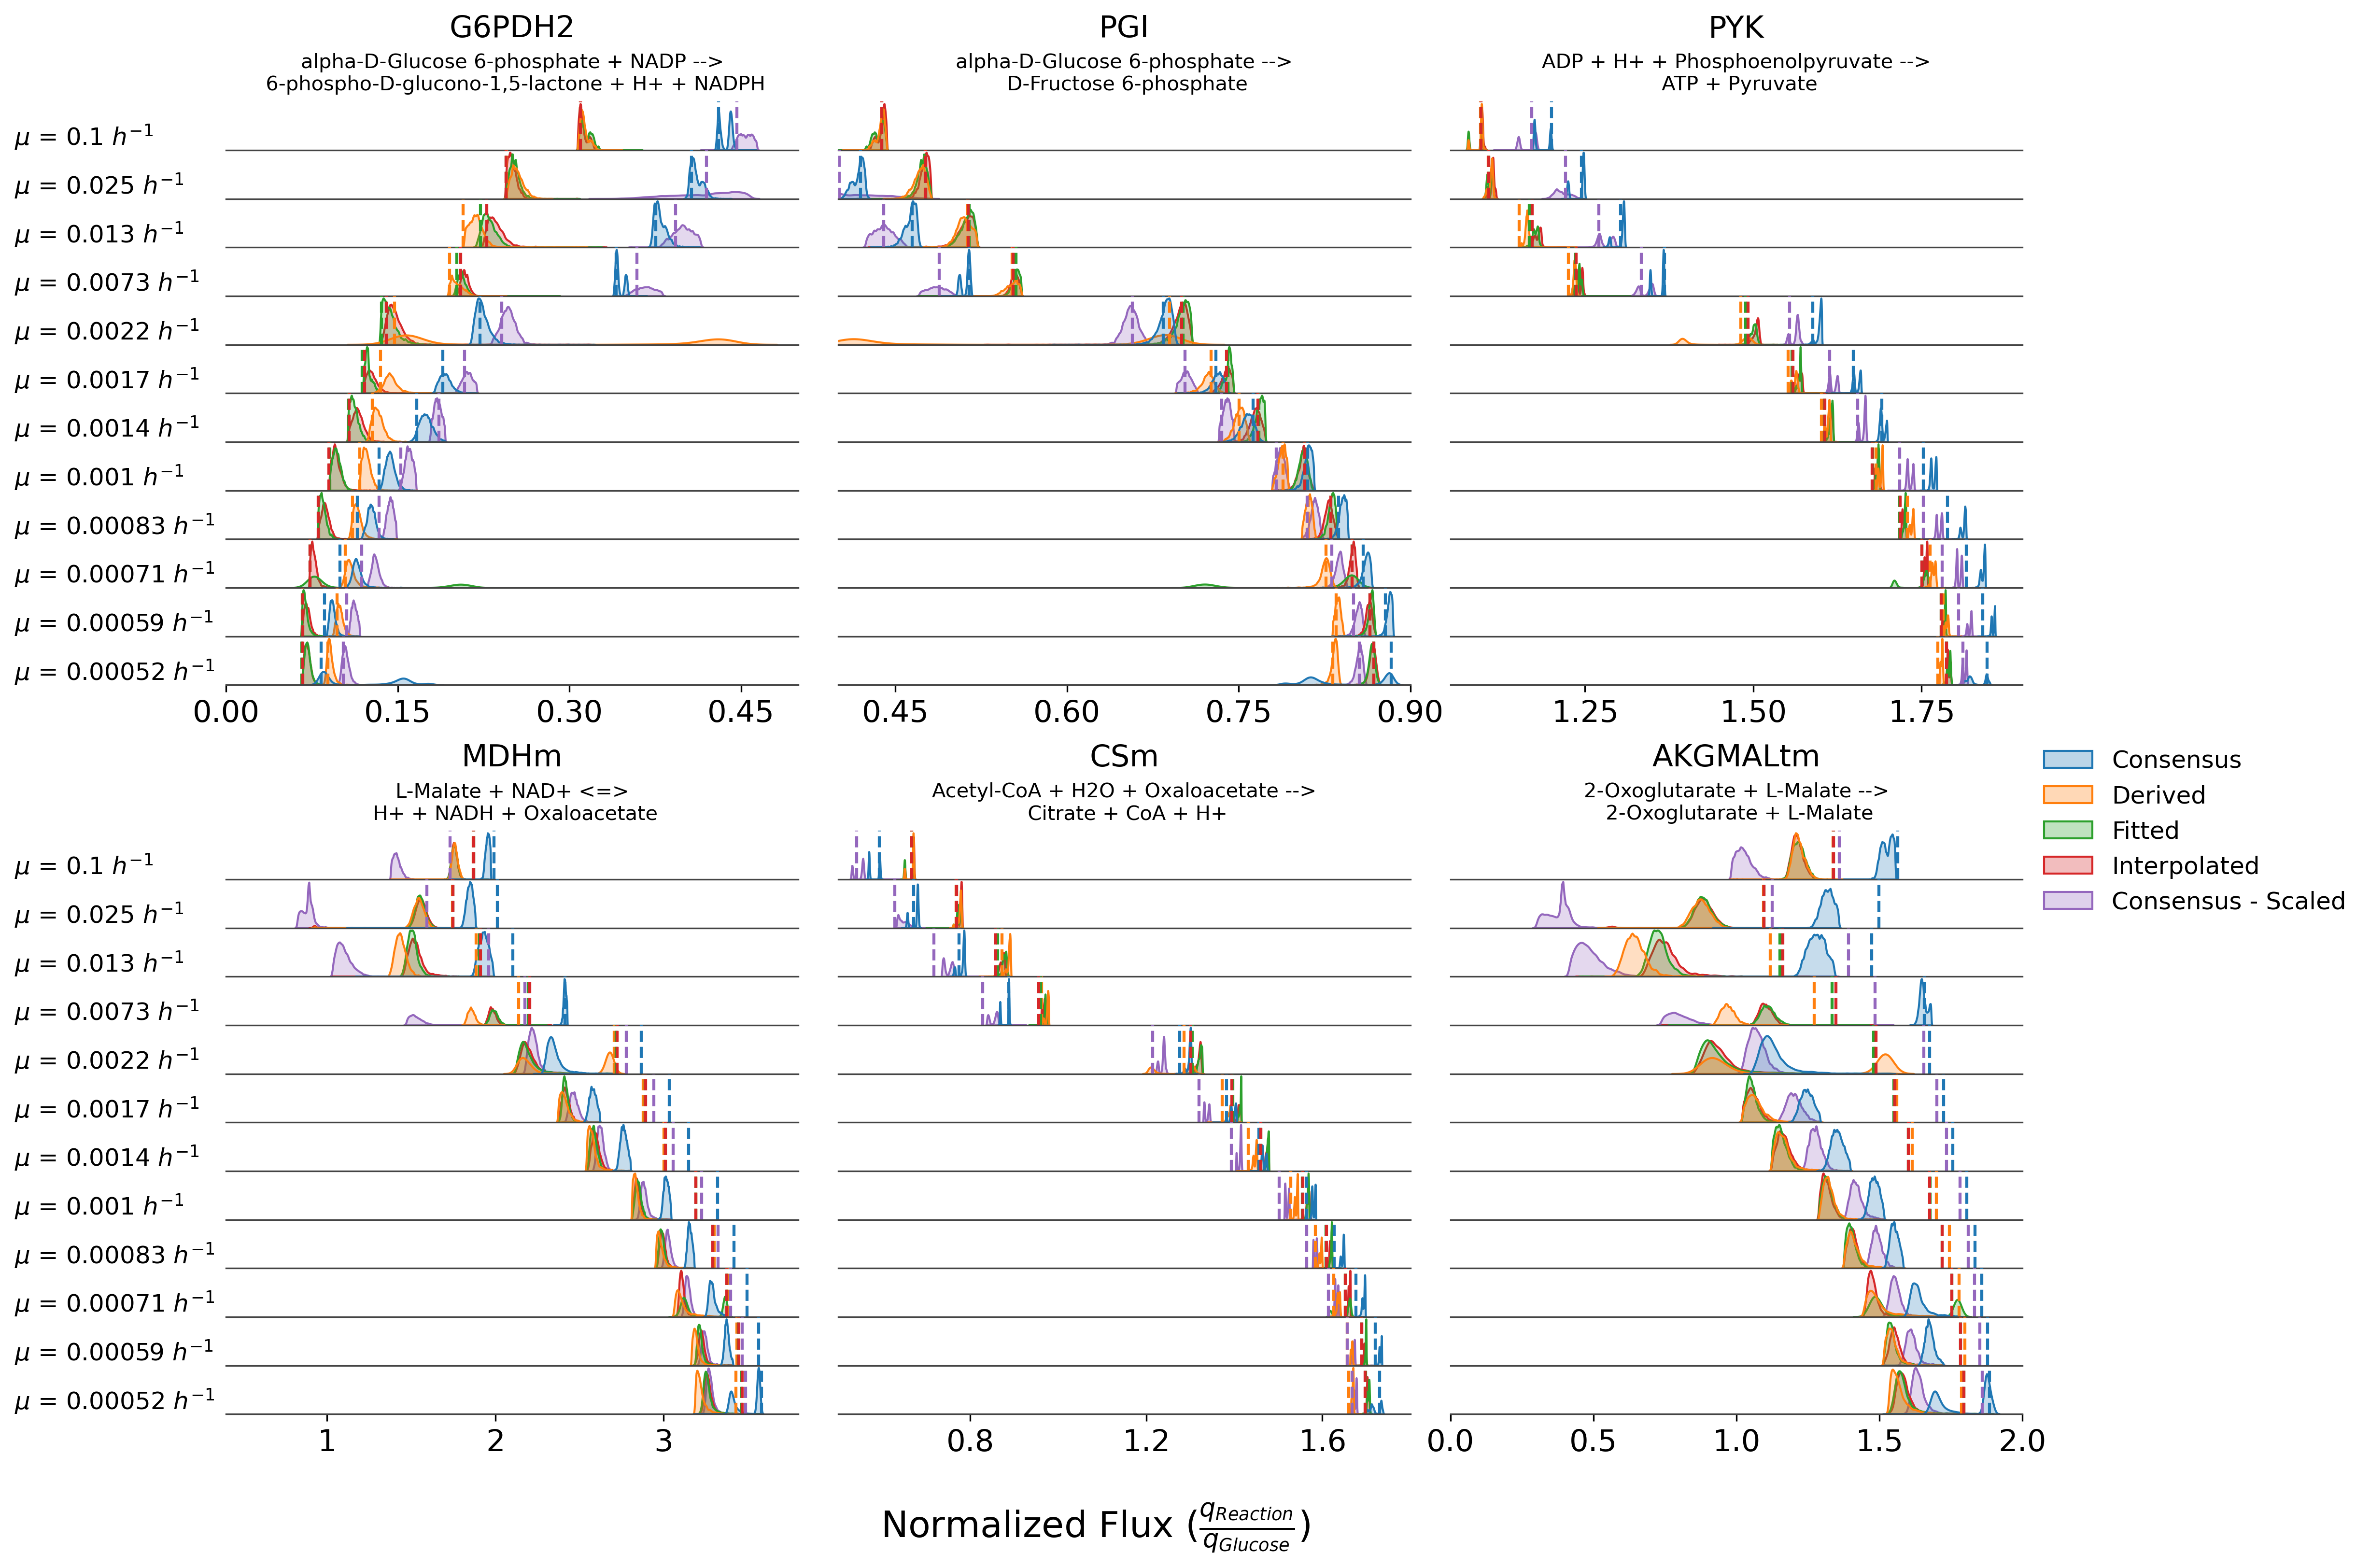

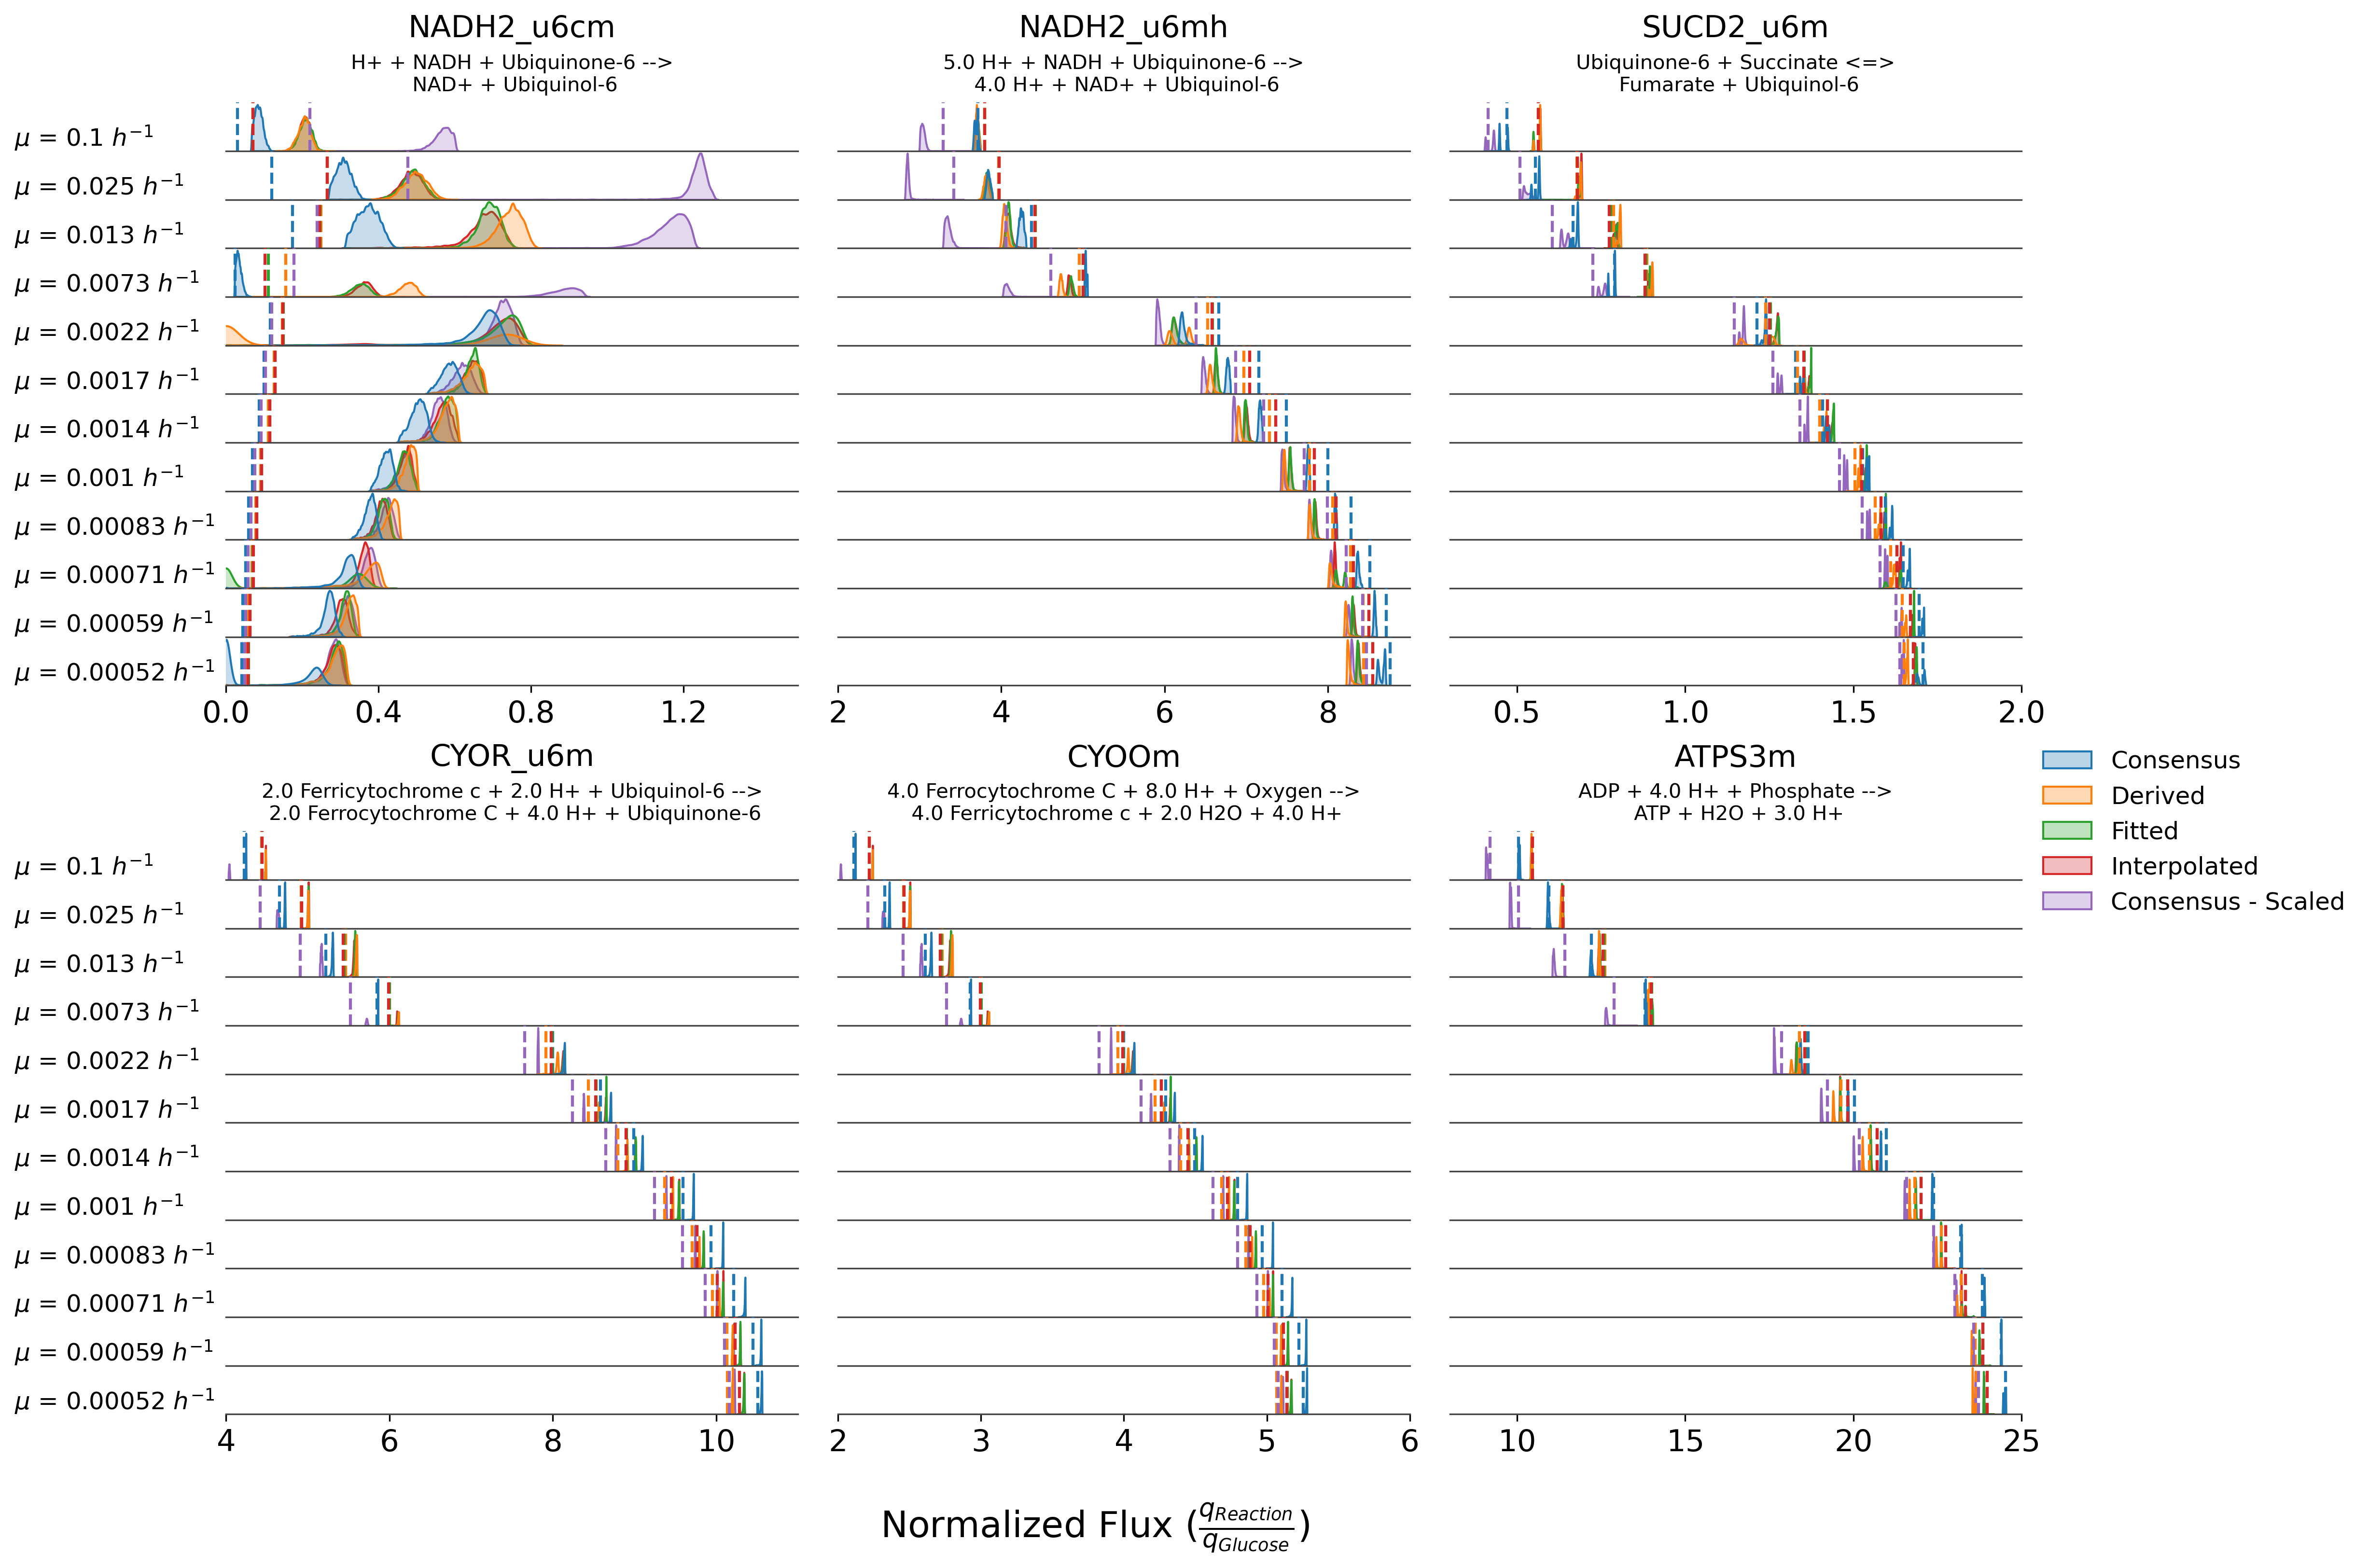

In [15]:
equation_names = ["Consensus","Derived", "Fitted", "Interpolated","ScaledConsensus"]

interesting_reactions = [("G6PDH2",0,0.5), ("PGI",0.4,0.9),("PYK",1.05,1.9),
                         ("MDHm", 0.4,3.8),("CSm", 0.5,1.8), ("AKGMALtm",0,2)]

plot_6_ridge(norm_chains_df, norm_pfba, interesting_reactions,"Gly&PPP", equation_names, model)

interesting_reactions = [("NADH2_u6cm",0,1.5),("NADH2_u6mh",2,9),("SUCD2_u6m",0.3,2),
                         ("CYOR_u6m", 4,11),("CYOOm", 2,6),("ATPS3m", 8,25)]

plot_6_ridge(norm_chains_df, norm_pfba, interesting_reactions,"ETC",equation_names, model)


##### Plot cofactor production fluxes

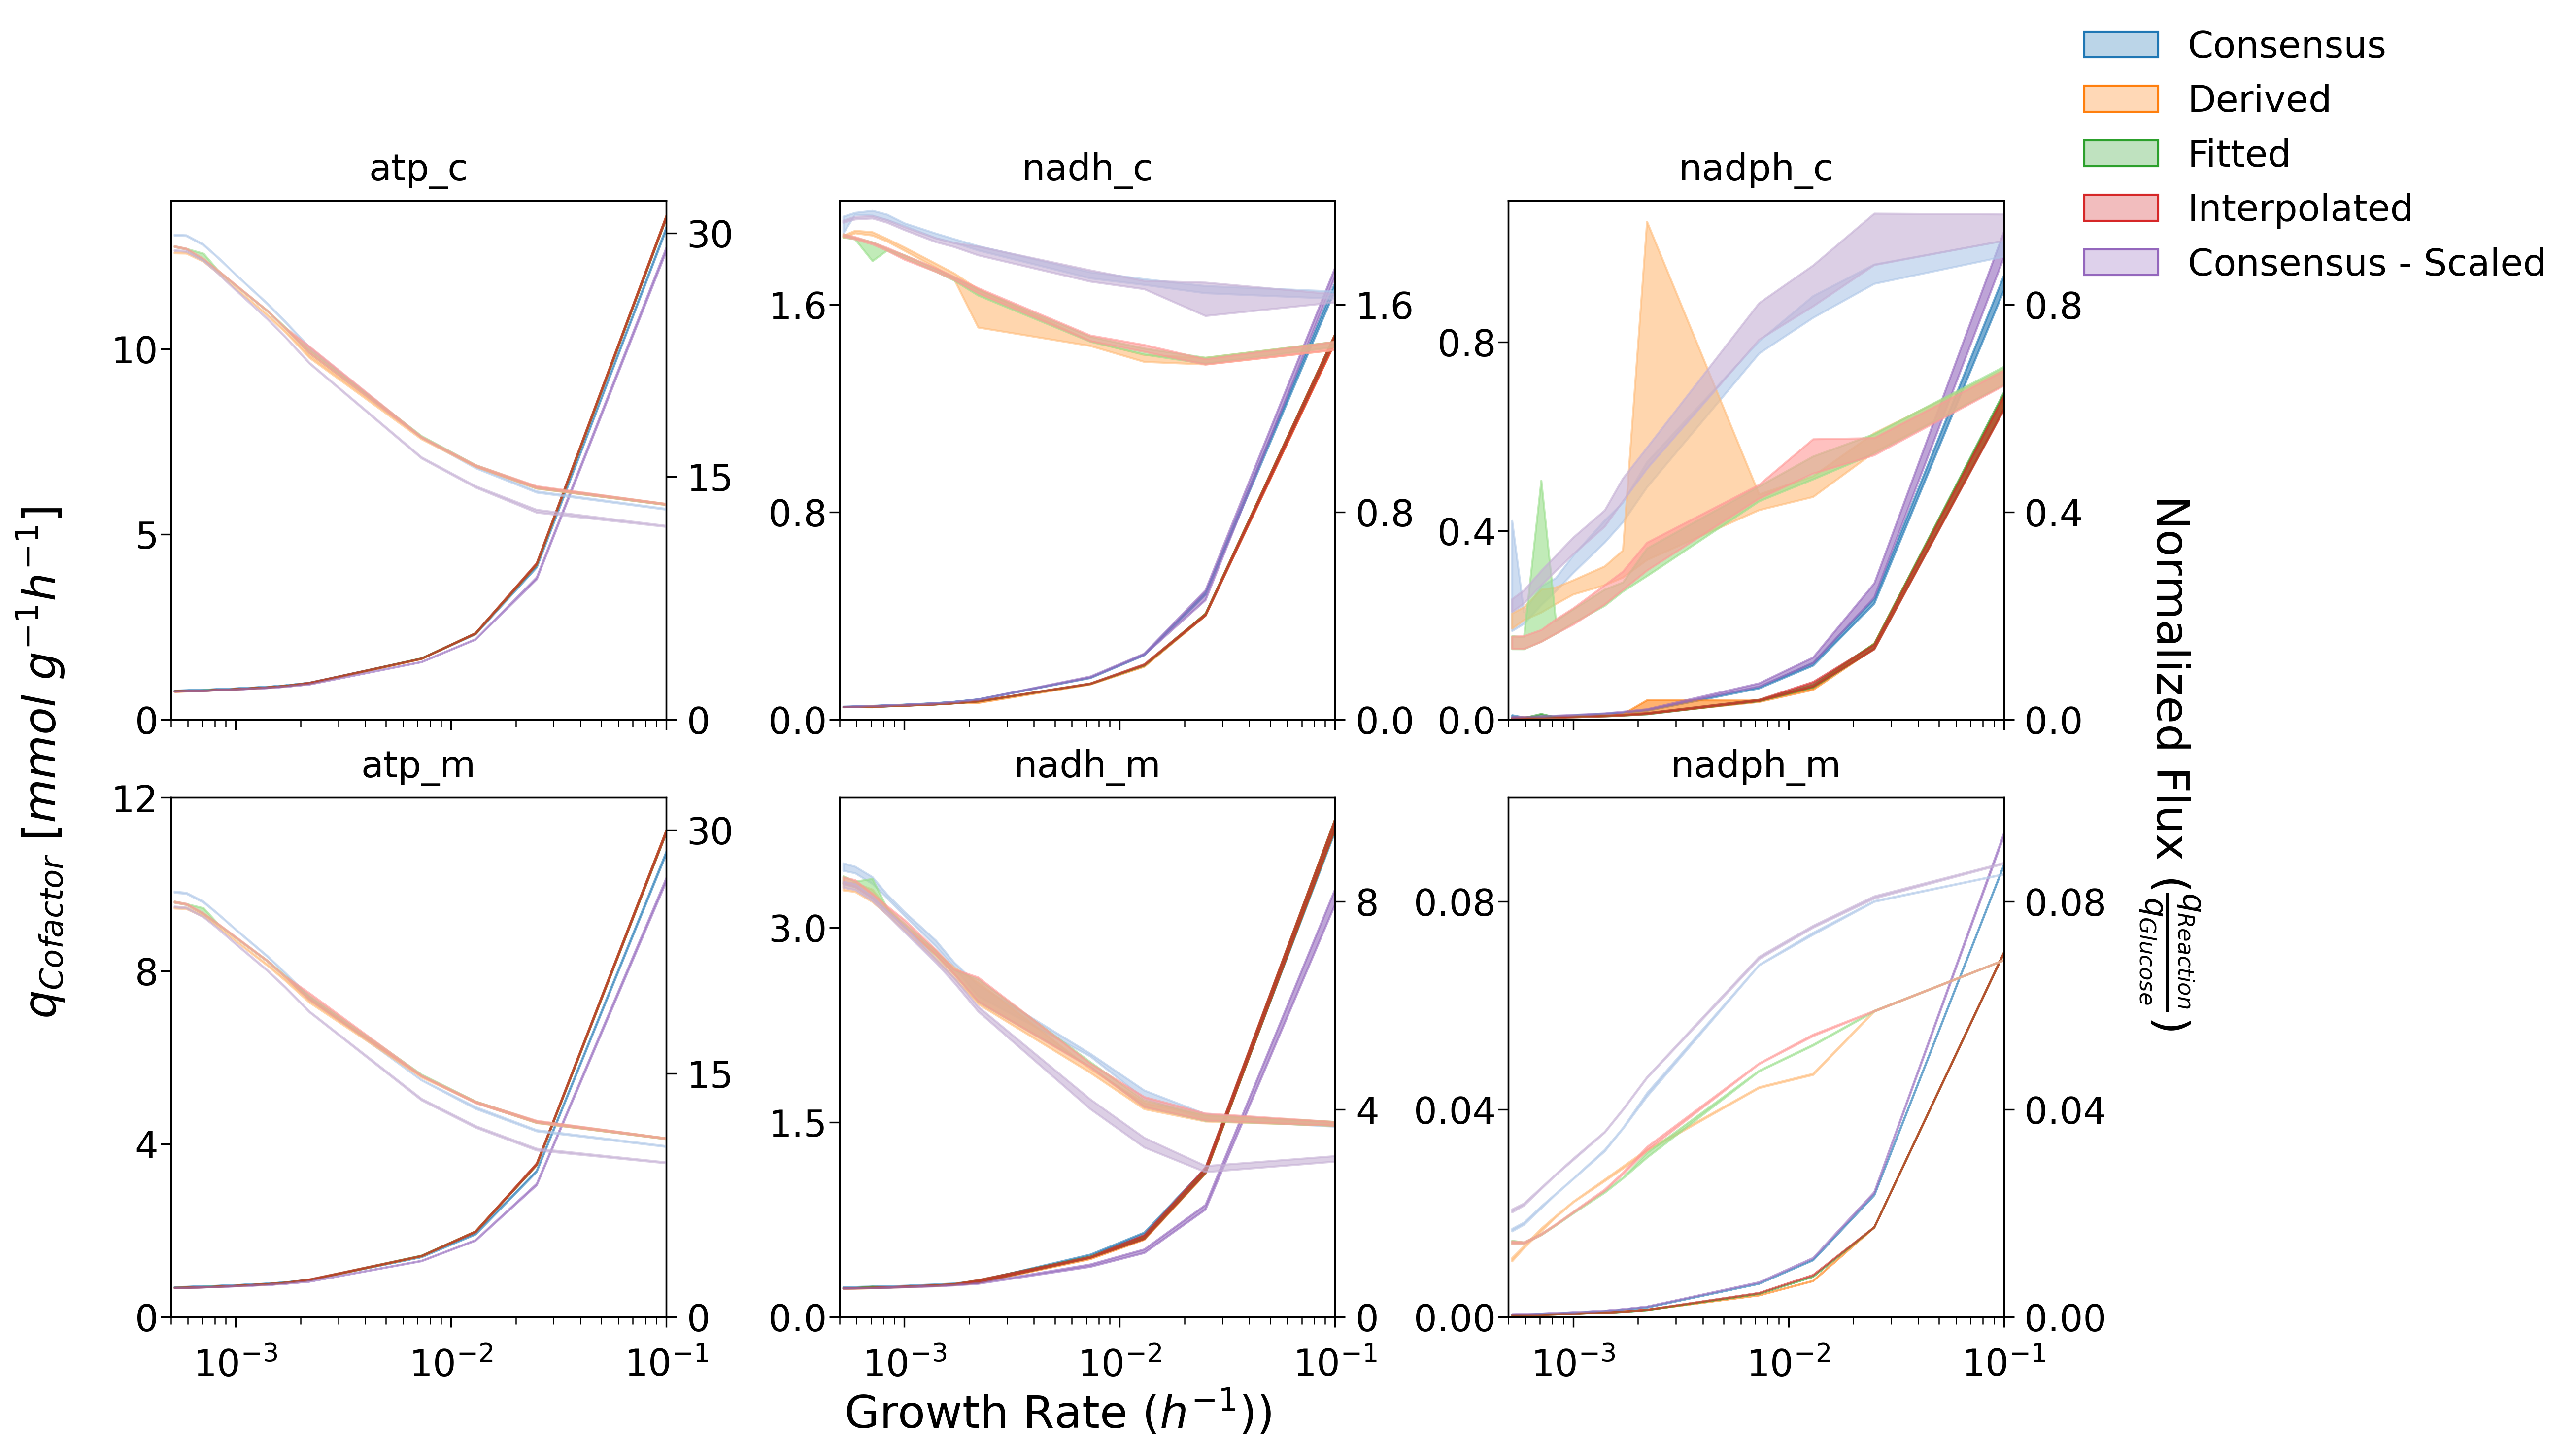

In [16]:
equation_names =  ["Consensus","Derived", "Fitted", "Interpolated","ScaledConsensus"]

interested_cofactors = [('atp_c',(0,14),(0,32)), 
                        ('nadh_c',(0,2),(0,2)), 
                        ('nadph_c', (0,1.1),(0,1)), 
                        ('atp_m', (0,12),(0,32)),
                        ('nadh_m', (0,4),(0,10)), 
                        ('nadph_m', (0,0.1),(0,0.1))]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16,10),dpi=300, sharex="col") # ) # 

cmap = plt.cm.get_cmap('tab20', 20)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]

for i, (cof, ax_lims, ax2_lims) in enumerate(interested_cofactors):
    norm_slice = cofactors_norm_ranges.loc[cof]
    total_slice = cofactors_ranges.loc[cof]

    if i > 2:
        ax = axs[1,i-3]
    else:
        ax = axs[0,i]
    
    ax.set_xscale("log")
    ax2 = ax.twinx()
    
    for j, biomass in enumerate(equation_names):
        
        x = total_slice.columns.astype(float)
        uy = total_slice.loc[(biomass, 0.975),:]  # 0.9875),:] 
        ly = total_slice.loc[(biomass, 0.025),:]  #0.0125),:] 
        
        ax.fill_between(x, uy, ly,alpha=0.6, color=color_list[j*2], label=biomass, zorder=10)

        uy = norm_slice.loc[(biomass, 0.975),:]  # 0.9875),:] 
        ly = norm_slice.loc[(biomass, 0.025),:] # 0.0125),:] 
        ax2.fill_between(x, uy, ly,alpha=0.6, color=color_list[1+j*2], label=biomass)
    
    ax.set_ylabel("")
    ax2.set_ylabel("")

    ax.set_xlabel("", fontsize=40, labelpad=20)
    
    ax.tick_params("y", labelsize=18, pad=1, length=5)
    ax.tick_params("x", labelsize=18, pad=10, length=5)
    ax.tick_params(which="minor",length=3.5)
    ax2.tick_params(labelsize=18, pad=5, length=5)
    
    ax.set_title(cof, fontsize=18,pad=10)
    ax.yaxis.set_major_locator(MaxNLocator(3))
    ax2.yaxis.set_major_locator(MaxNLocator(3))

   
    ax.set_xlim(0.0005,0.1)
    ax.set_ylim(ax_lims)
    ax2.set_ylim(ax2_lims)
    
plt.subplots_adjust(wspace=0.35, hspace=0.15) #hspace=0.25)


labels = [eqn if not eqn == "ScaledConsensus" else "Consensus - Scaled" for eqn in equation_names]       
legend_elements = [mpatches.Patch(edgecolor=cmap(i*2), label=eqn, facecolor=cmap(i*2)[:-1] + (0.3,)) for i, eqn in enumerate(labels)]
legend = fig.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(0.92,0.91), fontsize=18, frameon=False)

fig.text(0.07, 0.5, r'$q_{Cofactor}$ $[mmol\ g^{{-1}} h^{{-1}}]$', ha='center', va='center', fontsize=22,rotation=90)
fig.text(0.97, 0.5, r'Normalized Flux ($\frac{q_{Reaction}}{q_{Glucose}}$)', ha='center', va='center', fontsize=22,rotation=270)
fig.text(0.5, 0.06, r'Growth Rate ($h^{-1})$)', ha='center', va='center', fontsize=22)

fig.savefig(f"../results/plots/Mu_vs_Cofactors.png",
            bbox_inches='tight',transparent=True)

##### Plot gas exchanges 

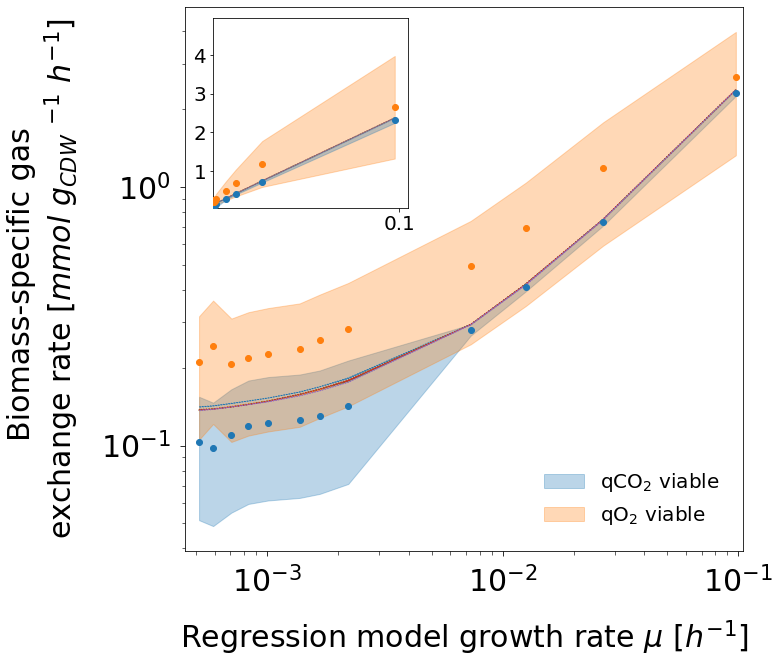

In [17]:
cmap = plt.cm.get_cmap('tab10', 10)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xscale("log")
ax.set_yscale("log")


x, y_co2, y_co2_sd, y_o2, y_o2_sd = DRinfo.loc[:, [("Growth Rate model 1/h", "mean"),
                                                    ("qCO2 viable model mmol/gh", "mean"),
                                                    ("qCO2 viable model mmol/gh", "std"),
                                                    ("qO2 viable model mmol/gh", "mean"),
                                                    ("qO2 viable model mmol/gh", "std")]].values.T
                    
      
ax.scatter(x,y_co2, c=color_list[0],zorder=10)
ax.fill_between(x, y_co2+y_co2_sd, y_co2-y_co2_sd, alpha=0.3, color=color_list[0], label="qCO$_2$ viable")

ax.scatter(x,y_o2, c=color_list[1],zorder=10)
ax.fill_between(x, y_o2+y_o2_sd, y_o2-y_o2_sd, alpha=0.3, color=color_list[1], label="qO$_2$ viable")      

ax.set_xlim(4.5e-4,0.105)

ax.set_xlabel('Regression model growth rate $\mu\ [h^{-1}]$', fontsize=30, labelpad=20)
ax.set_ylabel('Biomass-specific gas \nexchange rate $[mmol\ g_{CDW}\ ^{-1}\ h^{-1}$]', fontsize=30,labelpad=20)
ax.tick_params(labelsize=30, pad=10, length=5)
ax.tick_params(which="minor",length=3.5)

axins = ax.inset_axes([0.05, 0.63, 0.35, 0.35])

axins.scatter(x,y_co2, c=color_list[0],zorder=10)
axins.fill_between(x, y_co2+y_co2_sd, y_co2-y_co2_sd, alpha=0.3, zorder=10, color=color_list[0])

axins.scatter(x,y_o2,  c=color_list[1],zorder=10)
axins.fill_between(x, y_o2+y_o2_sd, y_o2-y_o2_sd, alpha=0.3, zorder=0, color=color_list[1])

for i, rxn in enumerate(["Ex_co2"]):
    
        
    for j, bio in enumerate(equation_names):

        col = color_list[i+j]
        
        ranges = quants.loc[bio].sort_index(level=1,ascending=False).abs()
        
        ax.fill_between(x,
                        ranges.loc[:,(rxn, 0.025) ],
                        ranges.loc[:,(rxn, 0.975) ],
                        alpha=1, zorder=5, color=col, linestyle=":",edgecolors=col)
    
        axins.fill_between(x,
                        ranges.loc[:,(rxn, 0.025) ],
                        ranges.loc[:,(rxn, 0.975) ],
                        alpha=0.6, zorder=5, color=col, linestyle=":",edgecolors=col)

axins.set_xlim(ax.get_xlim())#[0,0.1])
axins.set_ylim(ax.get_ylim())#[0,3])
axins.xaxis.set_major_locator(MultipleLocator(0.1))
axins.yaxis.set_major_locator(MultipleLocator(1))

axins.tick_params(labelsize=20)


# if log:
ax.legend(loc='lower right',bbox_to_anchor=(0.99,0.01), frameon=False, 
      fontsize='small',prop={'size':20})


fig.savefig(f"../results/plots/Mu_vs_Gas_sampled.png",
        bbox_inches='tight',transparent=True)

#### Statistical comparisons 
- significant differences between biomass equation generation methods & at different growth rates
Use 1000 samples instead of the 5000 to reduce computational time

In [18]:
%%time

all_sp_stats_norm = pd.DataFrame()

data = DRinfo.loc[:,model_viab_cols]

comparisons = [("Consensus","ScaledConsensus"), ("Consensus","Derived"), ("Consensus", "Interpolated"), ("Consensus", "Fitted"),
               ("ScaledConsensus","Derived"), ("ScaledConsensus", "Interpolated"), ("ScaledConsensus", "Fitted"),
               ("Interpolated", "Derived"), ("Interpolated", "Fitted"),
               ("Derived", "Fitted")]


for comp in comparisons:

    first, second = comp
    
    comp_stats = []

    for name, values in data.iterrows():
        
        start = time.time()

        name = str(name)
        mu = values[0]
        df1 = pd.read_pickle(f"../results/sampling/{first}_{name}_T{optthin}.pkl.gz")
        df2 = pd.read_pickle(f"../results/sampling/{second}_{name}_T{optthin}.pkl.gz")

    
        shared_columns = list(set(df1.columns).intersection(df2.columns))
        df1 = df1.loc[:,shared_columns] 
        df2 = df2.loc[:,shared_columns] 

        mask = (df1.sum(axis=0) == 0)&(df1.sum(axis=0) == df2.sum(axis=0))
        
        df1 = df1.loc[:, ~mask]
        df2 = df2.loc[:, ~mask]
        
        df1 = df1.sample(1000)
        df2 = df2.sample(1000)

        rxn_names = df1.columns
        n_rxns = len(rxn_names) ### CHeck both have same number each time
        yield_rxn = 'Ex_glc_D'

        ix = df1.columns.get_loc(yield_rxn)
        
        df1 = df1.values
        df2 = df2.values
        

        rel_df1 = df1 * np.abs(1/df1[:,[ix]])
        rel_df2 = df2 * np.abs(1/df2[:,[ix]])

        index = pd.MultiIndex.from_product([[name], rxn_names])
        sp_stats = pd.DataFrame(columns = ['Reaction','U-val', 'M P-value', 'RBC', 'CLES', 'Rhat', 'VD-A', 'VD Magnitude',"Cliff's D"])

        for_pool = []
        for i in np.arange(0,n_rxns):
            rxn_name = rxn_names[i]
            col_df1 = rel_df1[:,i]
            col_df2 = rel_df2[:,i]
            for_pool.append([col_df1, col_df2, rxn_name])
        

        pool = Pool(processes=processes)
        all_series = pool.starmap(calcstats, for_pool)
        pool.close()
        
        sp_stats = pd.concat(all_series,axis=1).T
        
        reject, adj_p, alpha_sid, alpha_bon = multipletests(np.abs(sp_stats["M P-value"].values), method="bonferroni",alpha=0.05/2) ## two tailed, so divide by 2
        sp_stats["Reject"] = reject
        sp_stats["Adjusted-p"] = adj_p.astype(float)
        sp_stats["M P-value"] = sp_stats["M P-value"].astype(float)
        sp_stats["Growth Rate"] = sp_gr[name]
        # sp_stats["Sampling Point"] = name
        
        comp_stats.append(sp_stats)
    comp_df = pd.concat(comp_stats)
    comp_df["Comparisons"] = f"{first} vs {second}"
    # comp_df.set_index(["Comparisons", "Sampling Point","Reaction"], inplace=True)
    comp_df.set_index(["Comparisons", "Growth Rate","Reaction"], inplace=True)
        
        
    all_sp_stats_norm = all_sp_stats_norm.append(comp_df)
# all_sp_stats_norm.index.get_level_values("Sampling Point")
all_sp_stats_norm["Reaction Number"] = all_sp_stats_norm.groupby("Growth Rate").cumcount() + 1   
# all_sp_stats_norm["Reaction Number"] = all_sp_stats_norm.groupby("Sampling Point").cumcount() + 1   
all_sp_stats_norm["Abs Cliff's D"] = all_sp_stats_norm["Cliff's D"].abs()
all_sp_stats_norm["Rxn Subsystem"] = all_sp_stats_norm.index.get_level_values("Reaction").to_series().apply(lambda x: rgdict.get(x)).values
all_sp_stats_norm.to_csv(f"../results/dataframes/sampling/MethodComparisons_AllStatistics.csv")

CPU times: user 2min 14s, sys: 7min 1s, total: 9min 16s
Wall time: 9min 20s


Median percentage of reactions differing across all comparisons

In [19]:
# rejects = all_sp_stats_norm.groupby(["Comparisons", "Sampling Point"])["Reject"].sum()#["Reject"]
# total_group = all_sp_stats_norm.groupby(["Comparisons", "Sampling Point"]).count().values[:,0]
rejects = all_sp_stats_norm.groupby(["Comparisons", "Growth Rate"])["Reject"].sum()#["Reject"]
total_group = all_sp_stats_norm.groupby(["Comparisons", "Growth Rate"]).count().values[:,0]
rejects = (rejects/total_group).to_frame().unstack()
print(f"Average of {round(100*rejects.stack().median().values[0],1)}% of reactions significantly differently dsitributed")
rejects.to_csv(f"../results/dataframes/sampling/MethodComparisons_MWURejects.csv")
rejects

Average of 72.1% of reactions significantly differently dsitributed


Reject                                \
Growth Rate                       0.00052   0.00059   0.00071   0.00083   
Comparisons                                                               
Consensus vs Derived             0.718322  0.679654  0.759067  0.741652   
Consensus vs Fitted              0.716113  0.713178  0.728353  0.706793   
Consensus vs Interpolated        0.666667  0.671266  0.708839  0.744898   
Consensus vs ScaledConsensus     0.685619  0.672872  0.752007  0.726719   
Derived vs Fitted                0.664076  0.661679  0.715391  0.714414   
Interpolated vs Derived          0.655923  0.668826  0.713165  0.664424   
Interpolated vs Fitted           0.625528  0.583266  0.664354  0.685013   
ScaledConsensus vs Derived       0.681970  0.686463  0.734875  0.700626   
ScaledConsensus vs Fitted        0.680000  0.669192  0.714783  0.699313   
ScaledConsensus vs Interpolated  0.650361  0.659403  0.716814  0.697225   

                                                                         \
Growth Rate                         0.001    0.0014    0.0017    0.0022   
Comparisons                                                               
Consensus vs Derived             0.741144  0.759633  0.748854  0.758589   
Consensus vs Fitted              0.730534  0.720627  0.715064  0.756326   
Consensus vs Interpolated        0.668948  0.731423  0.737765  0.778696   
Consensus vs ScaledConsensus     0.720909  0.723133  0.734013  0.781489   
Derived vs Fitted                0.735374  0.731201  0.727763  0.697248   
Interpolated vs Derived          0.683117  0.714669  0.725436  0.715440   
Interpolated vs Fitted           0.637391  0.659740  0.714684  0.684497   
ScaledConsensus vs Derived       0.715722  0.765862  0.748393  0.727608   
ScaledConsensus vs Fitted        0.685333  0.756664  0.707650  0.712687   
ScaledConsensus vs Interpolated  0.685764  0.754448  0.739815  0.751152   

                                                                         
Growth Rate                        0.0073     0.013     0.025       0.1  
Comparisons                                                              
Consensus vs Derived             0.778426  0.756187  0.832008  0.772059  
Consensus vs Fitted              0.810413  0.776000  0.749763  0.805643  
Consensus vs Interpolated        0.756890  0.789733  0.799798  0.805846  
Consensus vs ScaledConsensus     0.738210  0.773973  0.779661  0.683579  
Derived vs Fitted                0.753398  0.755290  0.730369  0.674974  
Interpolated vs Derived          0.688119  0.794359  0.716981  0.550308  
Interpolated vs Fitted           0.747525  0.701737  0.683159  0.446483  
ScaledConsensus vs Derived       0.721848  0.760331  0.823026  0.686758  
ScaledConsensus vs Fitted        0.764088  0.769750  0.742574  0.684258  
ScaledConsensus vs Interpolated  0.732039  0.795958  0.801325  0.664855

- Percentage of reactions that had a large effect size in a comparison
Note, that between 5% and 10% of reactions had a large effect size for the C0.1 and 0.0 sampling points for the Derived, Fitted and Inteprolated despite the fact the biomass equation is the same. This is largely due to random smapling effecs

In [20]:
# large = (all_sp_stats_norm["VD Magnitude"] == "large").groupby(["Comparisons", "Sampling Point"]).sum()
large = (all_sp_stats_norm["VD Magnitude"] == "large").groupby(["Comparisons", "Growth Rate"]).sum()
large = (large/total_group).to_frame().unstack()
print(f"Average of {round(100*large.stack().median().values[0],1)}% of reactions demonstrate a large effect size")
large.to_csv(f"../results/dataframes/sampling/MethodComparisons_LargeEffects.csv")
large

Average of 45.5% of reactions demonstrate a large effect size


VD Magnitude                                \
Growth Rate                          0.00052   0.00059   0.00071   0.00083   
Comparisons                                                                  
Consensus vs Derived                0.435788  0.451082  0.410190  0.420914   
Consensus vs Fitted                 0.434783  0.455642  0.430390  0.453138   
Consensus vs Interpolated           0.387952  0.426136  0.458406  0.454932   
Consensus vs ScaledConsensus        0.405518  0.468972  0.480821  0.468233   
Derived vs Fitted                   0.423143  0.423940  0.428203  0.433303   
Interpolated vs Derived             0.404512  0.429150  0.454228  0.409588   
Interpolated vs Fitted              0.255283  0.252615  0.291414  0.333616   
ScaledConsensus vs Derived          0.414858  0.425328  0.477758  0.456658   
ScaledConsensus vs Fitted           0.429167  0.421717  0.459130  0.454467   
ScaledConsensus vs Interpolated     0.352847  0.428571  0.491150  0.465938   

                                                                         \
Growth Rate                         0.001    0.0014    0.0017    0.0022   
Comparisons                                                               
Consensus vs Derived             0.469573  0.484404  0.496792  0.487465   
Consensus vs Fitted              0.466317  0.454308  0.472777  0.531396   
Consensus vs Interpolated        0.426005  0.433303  0.506002  0.520661   
Consensus vs ScaledConsensus     0.427273  0.447177  0.441149  0.517176   
Derived vs Fitted                0.460846  0.452895  0.402516  0.424771   
Interpolated vs Derived          0.408658  0.437388  0.482094  0.430880   
Interpolated vs Fitted           0.313043  0.298701  0.367100  0.368087   
ScaledConsensus vs Derived       0.457038  0.505809  0.471993  0.457064   
ScaledConsensus vs Fitted        0.447111  0.473775  0.474499  0.486007   
ScaledConsensus vs Interpolated  0.403646  0.476868  0.487963  0.474654   

                                                                         
Growth Rate                        0.0073     0.013     0.025       0.1  
Comparisons                                                              
Consensus vs Derived             0.523810  0.514207  0.572565  0.592437  
Consensus vs Fitted              0.531434  0.529000  0.525118  0.582027  
Consensus vs Interpolated        0.539370  0.530109  0.552073  0.597077  
Consensus vs ScaledConsensus     0.537055  0.555773  0.549906  0.502768  
Derived vs Fitted                0.411650  0.424103  0.117313  0.138110  
Interpolated vs Derived          0.435644  0.440400  0.162860  0.088296  
Interpolated vs Fitted           0.411881  0.418919  0.136061  0.047910  
ScaledConsensus vs Derived       0.497594  0.539945  0.581351  0.512329  
ScaledConsensus vs Fitted        0.517670  0.526975  0.514851  0.489536  
ScaledConsensus vs Interpolated  0.536893  0.551492  0.545885  0.503623

##### Enrichment analysis on the different subsystems to determine where the significant changes occured

In [21]:
rgdict = {}
for g in model.groups:
    for r in g.members:
        rgdict[r.id] = g.id.title()
        
subsystem_df = pd.DataFrame.from_dict(rgdict, orient="index").reset_index()
subsystem_df = subsystem_df.rename(columns={"index":"Rxn", 0:"Subsystem"})



In [22]:
all_output = []


for comparison in large.index:
    for sp in large.columns.get_level_values(1):
        
        ## using enrich function in CBModellingFuncs
        temp = all_sp_stats_norm.loc[(comparison, sp),"VD Magnitude"]
        output = enrich(temp[temp == "large"].index, subsystem_df["Rxn"].to_list(), subsystem_df) 
        if comparison == f"{first} vs {second}" and sp ==name:
            save = output
        all_output.extend(output.loc[output["adj_pval"] < 0.05, "Subsystem annotation"].to_list())
        
number_enriched = pd.Series(all_output).value_counts().to_frame().rename(columns={0:"Counts"})
number_enriched["Fraction"] = number_enriched["Counts"]/(large.shape[0]*large.shape[1])

number_enriched.to_csv(f"../results/dataframes/sampling/MethodComparisons_EnrichedPathways.csv")

number_enriched

/home/users/bcoltman/.conda/envs/memo3.7/lib/python3.7/site-packages/pandas/core/indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Counts  Fraction
Sterol Metabolism                                      114  0.950000
Exchange Reaction                                      111  0.925000
Biomass Composition                                    110  0.916667
Transport, Er                                          108  0.900000
Sphingolipid Metabolism                                100  0.833333
Porphyrin And Chlorophyll Metabolism                   100  0.833333
Fatty Acid Biosynthesis                                 96  0.800000
Amino Sugar And Nucleotide Sugar Metabolism             95  0.791667
Quinone Biosynthesis                                    88  0.733333
Pentose Phosphate Pathway                               67  0.558333
Riboflavin Metabolism                                   57  0.475000
Pantothenate And Coa Biosynthesis                       35  0.291667
Histidine Metabolism                                    21  0.175000
Thiamine Metabolism                                     19  0.158333
Transport, Extracellular                                15  0.125000
Threonine And Lysine Metabolism                         10  0.083333
Methionine Metabolism                                   10  0.083333
Pyridoxine Metabolism                                    8  0.066667
Other Amino Acid Metabolism                              8  0.066667
Glyoxylate And Dicarboxylate Metabolism                  7  0.058333
Vitamin And Cofactor Biosynthesis                        6  0.050000
Transport, Mitochondrial                                 6  0.050000
Glycolysis/Gluconeogenesis                               5  0.041667
Folate Metabolism                                        5  0.041667
Methanol Metabolism                                      4  0.033333
Tyrosine, Tryptophan, And Phenylalanine Metabolism       4  0.033333
Nad Biosynthesis                                         3  0.025000
Cysteine Metabolism                                      3  0.025000
Citric Acid Cycle                                        2  0.016667
Arginine And Proline Metabolism                          2  0.016667
Valine, Leucine, And Isoleucine Metabolism               2  0.016667
Transport, Golgi Apparatus                               1  0.008333
Phospholipid Metabolism                                  1  0.008333
Glycerolipid Metabolism                                  1  0.008333

### Additional analysis
- Not included in manuscript

##### Alternative plot of the 12 reactions. Flux yields and flux vs growth rate

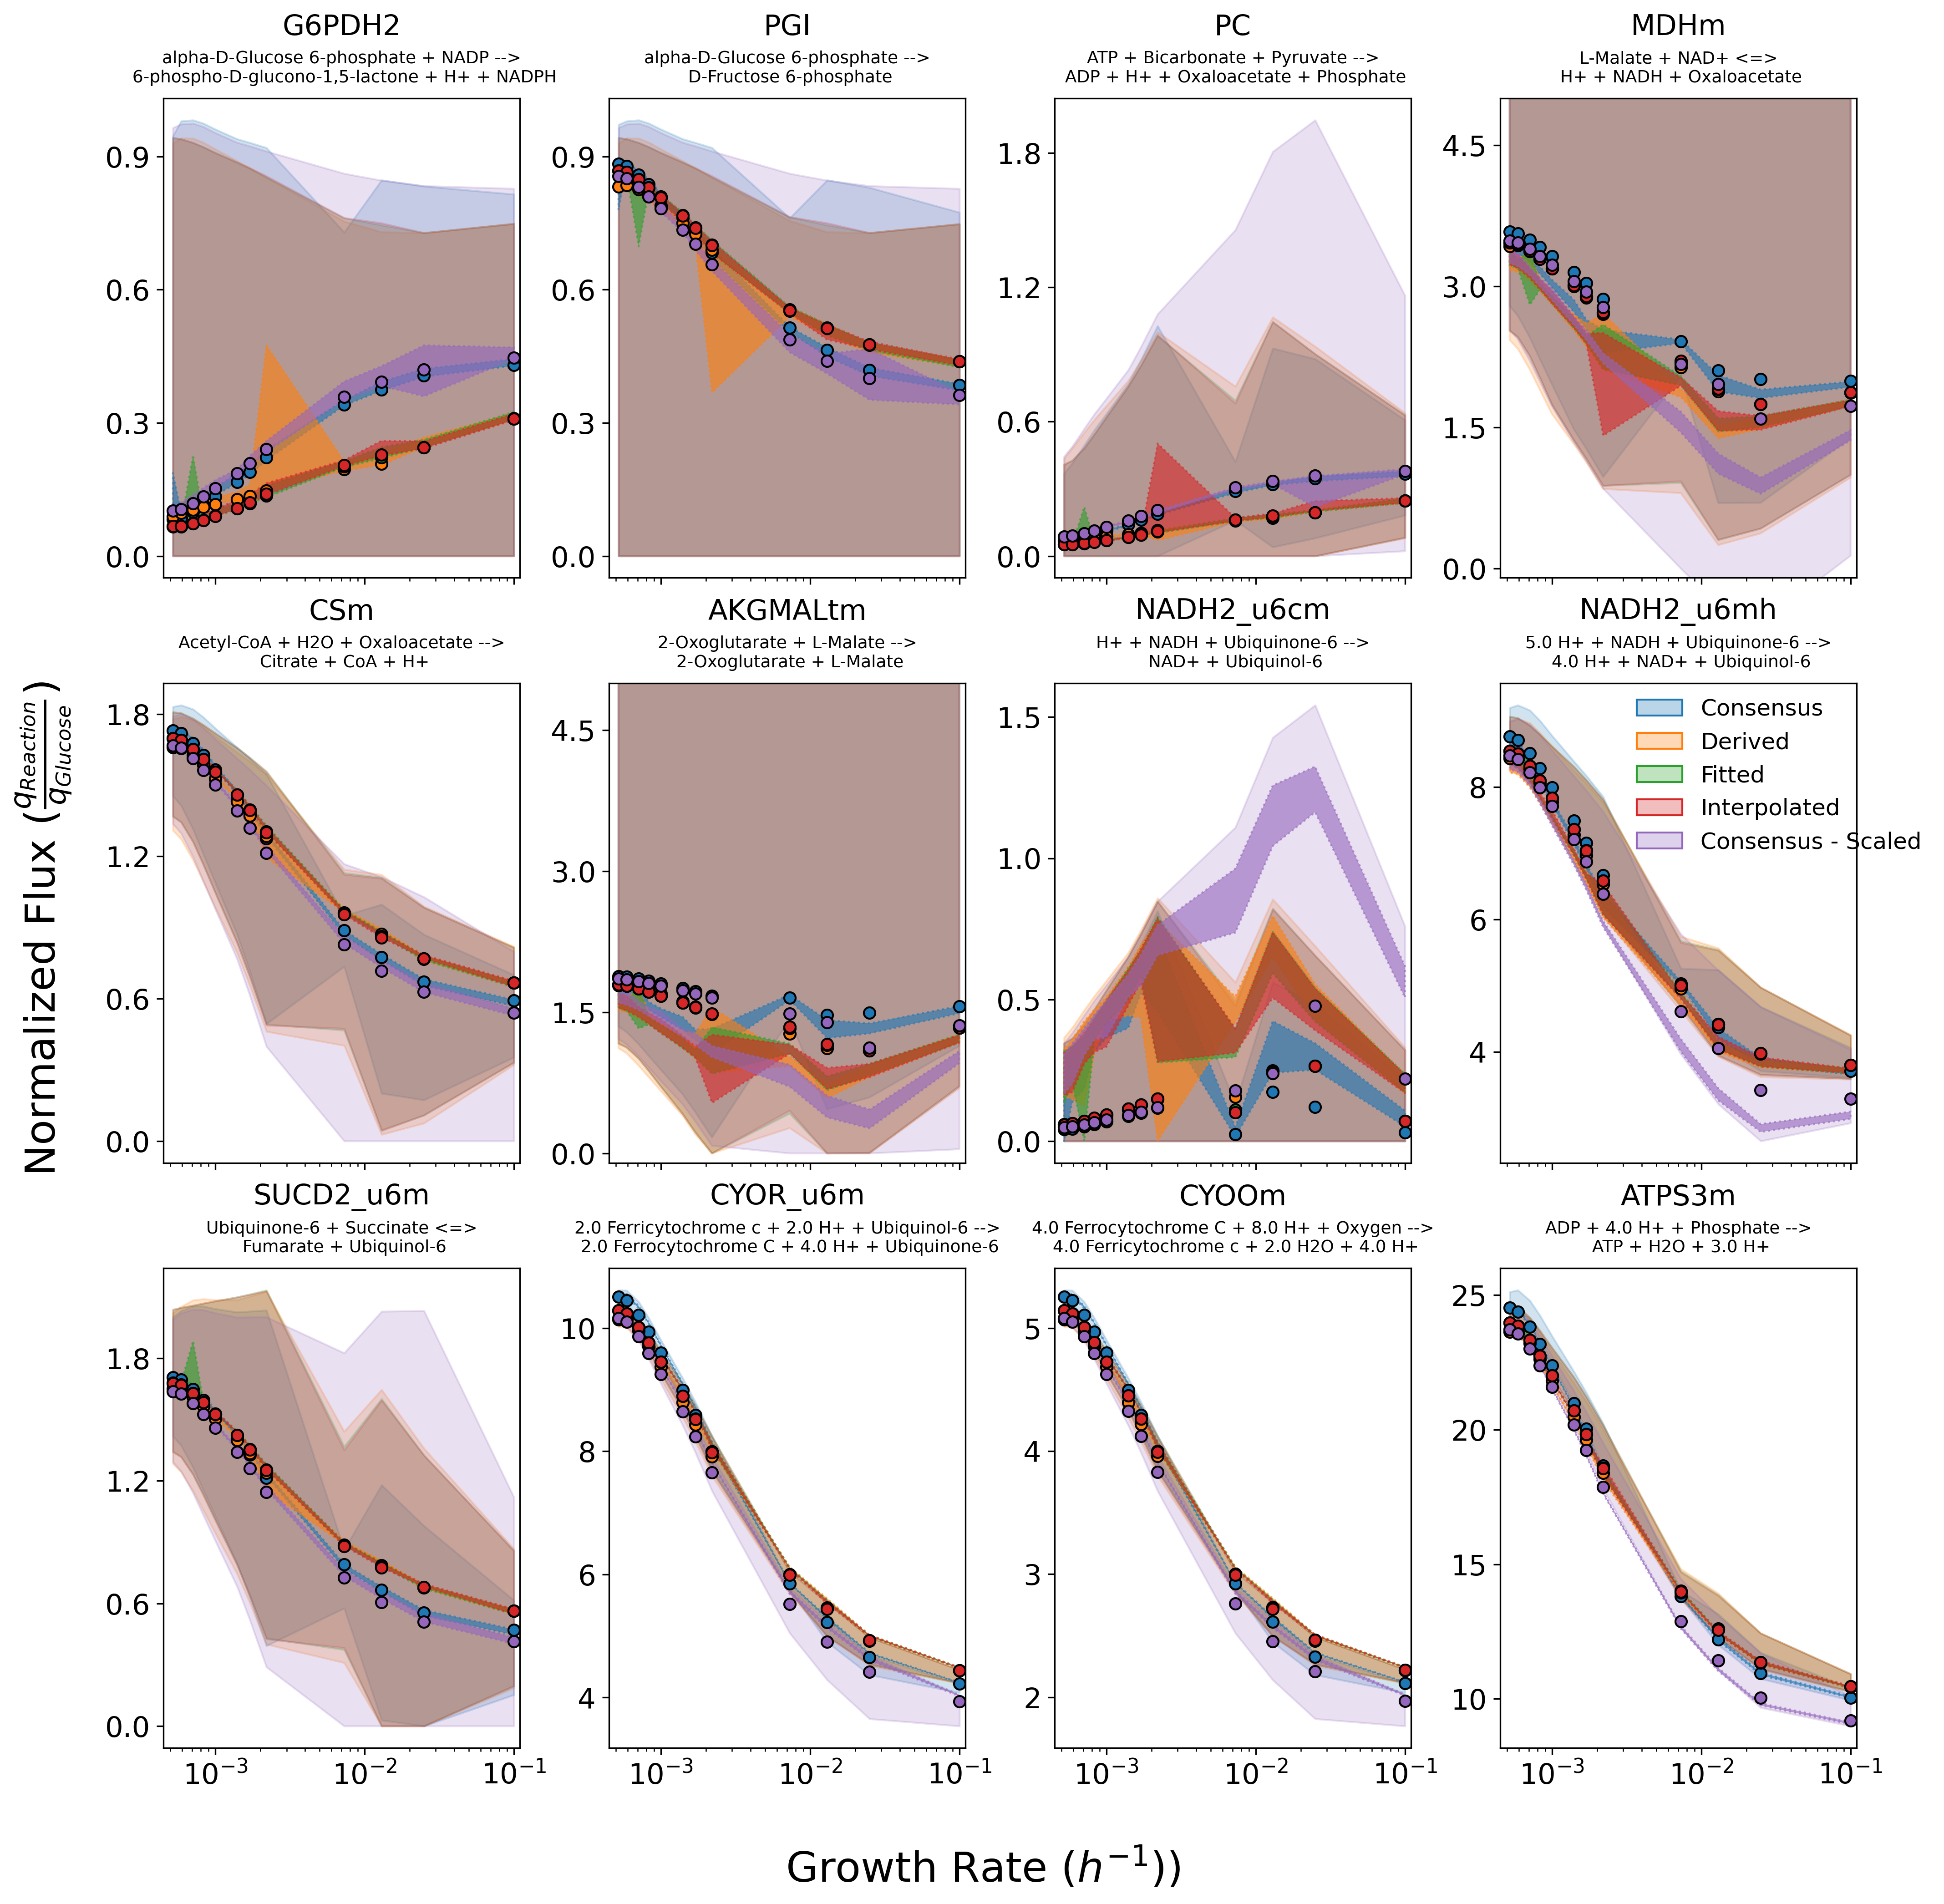

In [23]:
def plot_12_reactions(interesting_reactions,out_name,biomass_equations, quants, fva, pfba):
    
    number_sps = len(quants.index.get_level_values("Time").unique()) #norm_chains.Time.unique())

    fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16,16),dpi=300, sharex="col") # ) # 

    cmap = plt.cm.get_cmap('tab10', 10)
    color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]

    for i, (rxn,lb,ub) in enumerate(interesting_reactions):

        if i < 4:
            ax = axs[0,i]
        elif i < 8:
            ax = axs[1,i-4]
        else:
            ax = axs[2,i-8]
            
        plotting_fluxes(ax, rxn, quants, fva, pfba,color_list=color_list,biomass=biomass_equations)
        ax.set_xscale("log")
        if rxn in ["AKGMALtm", "MDHm"]:
            ax.set_ylim(-0.1, 5)
        # ax.set_ylim(lb, ub)
        ax.set_xlim(4.5e-4,0.11)
        from matplotlib.ticker import MultipleLocator, MaxNLocator
        ax.yaxis.set_major_locator(MaxNLocator(4))

        string = model.reactions.get_by_id(rxn).build_reaction_string(True)
        if string.find(">") > -1:
            string = string.split(">")
            string = (">\n").join(string)
        elif string.rfind("-") > -1:
            string = string.rsplit("-",1)
            string = ("-\n").join(string)


        ax.set_xlabel("")
        ax.tick_params(labelsize= 15)

        ax.text(0.5, 1.12, rxn, fontsize=15, transform = ax.transAxes,horizontalalignment='center',verticalalignment='bottom') 
        ax.text(0.5, 1.1, string, fontsize=9, transform = ax.transAxes,horizontalalignment='center',verticalalignment='top')  
        

    import matplotlib.patches as mpatches
    plt.subplots_adjust(wspace=0.25, hspace=0.22) #hspace=0.25)


    legend_elements = [mpatches.Patch(edgecolor=cmap(k), label=eqn if not eqn == "ScaledConsensus" else "Consensus - Scaled", 
                                      facecolor=cmap(k)[:-1] + (0.3,)) for k, eqn in enumerate(biomass_equations)]
   
    legend = fig.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(0.79,0.57), fontsize=12, frameon=False)

    fig.text(0.07, 0.5, r'Normalized Flux ($\frac{q_{Reaction}}{q_{Glucose}}$)', ha='center', va='center', fontsize=22,rotation=90)
    fig.text(0.5, 0.07, r'Growth Rate ($h^{-1})$)', ha='center', va='center', fontsize=22)

    fig.savefig(f"../results/plots/FluxYieldAll.png",
            bbox_inches='tight',transparent=True)  
    
def plotting_fluxes(ax,rxn, sampling_data, fva_data, pfba_data, color_list=None, biomass=None):
    if biomass == None:
        biomass = ["Dynamic", "Consensus"]
    elif type(biomass) != list:
        biomass = list(biomass)
    
    if color_list == None:
        cmap = plt.cm.get_cmap('tab10', 10)
        color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
    
    
    for i, bio in enumerate(biomass):
        
        col = color_list[i]
        
        fva_ranges = fva_data.loc[bio].sort_index(level=1)
        samples = sampling_data.loc[bio].sort_index(level=1)
        flux = pfba_data.loc[bio].sort_index(level=1)
        
        ax.fill_between(fva_ranges.index.get_level_values("Growth Rate").astype(float),
                        fva_ranges.loc[:,(rxn, "minimum") ],
                        fva_ranges.loc[:,(rxn, "maximum") ],
                        alpha=0.2,zorder=0, color=col)
        
        ax.fill_between(samples.index.get_level_values("Growth Rate").astype(float),
                        samples.loc[:,(rxn, 0.025) ],
                        samples.loc[:,(rxn, 0.975) ],
                        alpha=0.6, zorder=5, color=col, linestyle=":",edgecolors=col)
        
        ax.scatter(flux.loc[:,rxn].index.get_level_values("Growth Rate").astype(float),
                   flux.loc[:,rxn],zorder=10, color=col, edgecolors="black")


interesting_reactions = [("G6PDH2",0,0.5), ("PGI",0.4,0.9),("PC",0,1),
                         ("MDHm", 0.4,3.8),("CSm", 0.5,1.8), ("AKGMALtm",0,2),
                         ("NADH2_u6cm",0,1.5),("NADH2_u6mh",2,9),("SUCD2_u6m",0.3,2),
                         ("CYOR_u6m", 4,11),("CYOOm", 2,6),("ATPS3m", 8,25)] 


plot_12_reactions(interesting_reactions,"All",equation_names, norm_quants, norm_fva,norm_pfba)


##### RQ plot

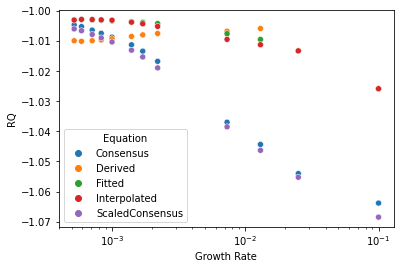

In [24]:
RQ = norm_chains_df["Ex_co2"].div(norm_chains_df["Ex_o2"])

fig, ax = plt.subplots()
to_plot = RQ.reset_index()
to_plot.rename(columns={0:"RQ"}, inplace=True)
to_plot = to_plot[to_plot["Equation"].isin(equation_names)]
to_plot["Growth Rate"] = to_plot["Growth Rate"].astype(float)
to_plot = to_plot.groupby(["Equation", "Growth Rate"]).median().reset_index()
sns.scatterplot(data=to_plot, x="Growth Rate",y="RQ",hue="Equation", hue_order=equation_names)
ax.set_xscale("log")

##### PCA analysis

Explained variation per principal component: [2.06983811e-01 6.22239442e-02 3.48161370e-02 ... 2.75742196e-35
 1.09530252e-35 4.55956777e-37]
Index(['METS', 'RPI', 'UMPK', 'CTPS1', 'GLNS', 'PRPPS', 'CBPS', 'RNA', 'CHORM',
       'HSDxi', 'KARA1im', 'E3MMALOR', 'CITCONH', 'E3MMALH', 'CITMALS',
       'DHORTS', 'ASPCT', 'OMPDC', 'ORPT', 'IMPD', 'GMPS2', 'ADSL2r', 'AIRCr',
       'PRASCS', 'PRAGSr', 'PRAIS', 'GARFTi', 'GLUPRT', 'PRFGS', 'ACLSm',
       'ASPKi', 'ASADi', 'PIt2r', 'Ex_pi', 'Ex_nh4', 'NH4t', 'ADSS', 'ADSL1r',
       'ACGKm', 'ORNTACim', 'ORNt3m', 'ACOTAim', 'AGPRim', 'HACNHm', 'HCITSm',
       'MCITDm', 'OXAGm', 'HICITDm', 'AASAD2', 'IMPC', 'AICART', 'GLUDyi',
       'HSK', 'THRS', 'PPNDH', 'OMCDCm', '3C4MOPtm', '4MOPtm', 'IPPSm',
       '3C3HMPtm', 'IPMD', 'IPPMIa', 'IPPMIb', 'LEUTA', 'AATA', 'SACCD1',
       'SACCD2', '2OBUTtm', 'DHAD2m', '3H3M2OPS', '3H3M2OPR', 'ALACPYRL', 'Ht',
       'Ex_h'],
      dtype='object')
Index(['STERYLEST', 'CYSTH2SS', 'BPNT', 'FRDO', 'Ex_so4'

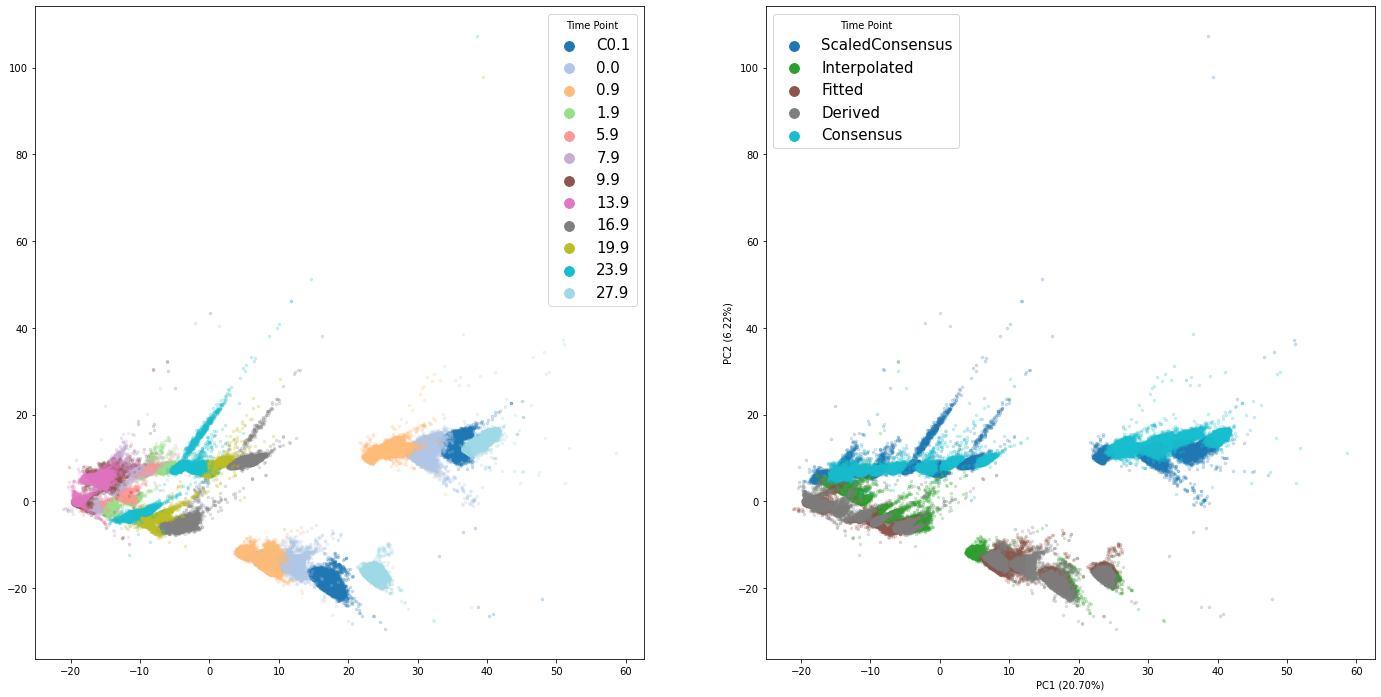

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets, preprocessing

dyn_x = norm_chains_df


x = dyn_x.values
x[np.isnan(x)] = 0
x = StandardScaler().fit_transform(x)
# normalised_x = pd.DataFrame(x,columns=norm_dyn_x.iloc[:,4:].columns)


pca_x = PCA()
principalComponents_x = pca_x.fit_transform(x)

print('Explained variation per principal component: {}'.format(pca_x.explained_variance_ratio_))

le = preprocessing.LabelEncoder()

# y = le.fit_transform(norm_chains_df.index.get_level_values("Time")) 
# targets = norm_chains_df.index.get_level_values("Time").unique().to_list() # columnsdyn_x["Time"].unique()

y = le.fit_transform(dyn_x.reset_index()["Time"])
targets = dyn_x.reset_index()["Time"].unique()

# y = le.fit_transform(dyn_x.reset_index()["Equation"])
# targets = dyn_x.reset_index()["Equation"].unique()


# features = norm_chains_df.columns 
features = dyn_x.columns 

cmap = plt.cm.get_cmap('tab20', len(targets))
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
    
# coordinates of samples (i.e., scores; let's take the first two axes)
scores = principalComponents_x[:, :2]

# coordinates of features (i.e., loadings; note the transpose)
loadings = pca_x.components_[:2].T

# proportions of variance explained by axes
pvars = pca_x.explained_variance_ratio_[:2] * 100

k=len(features)//80
tops = (loadings ** 2).sum(axis=1).argsort()[-k:]
arrows = loadings[tops]
arrows /= np.sqrt((arrows ** 2).sum(axis=0))
arrows *= np.abs(scores).max(axis=0)

fig, axes = plt.subplots(ncols=2,figsize=(24,12))
# plt.figure(figsize=(12, 12))
for i, name in enumerate(targets):
    axes[0].scatter(*zip(*scores[y == i]), label=name, s=6, alpha=0.2,c=color_list[i])
    
legend = axes[0].legend(title='Time Point',fontsize=15,markerscale=4)
[h.set_alpha(1) for h in legend.legendHandles]

# width = -0.0005 * np.min([np.subtract(*plt.xlim()), np.subtract(*plt.ylim())])
# for i, arrow in zip(tops, arrows):
#     plt.arrow(0, 0, *arrow, color='k', alpha=0.75, width=width, ec='none',
#               length_includes_head=True)
#     plt.text(*(arrow * 1.15), features[i], ha='center', va='center')

for i, axis in enumerate('xy'):
    # getattr(plt, f'{axis}ticks')([])
    getattr(plt, f'{axis}label')(f'PC{i + 1} ({pvars[i]:.2f}%)')
    
    
## Take the top 5% of features explaining PC1
print(features[(pca_x.components_[0].T ** 2).argsort()[-len(features)//20:]])

# take the top 5% of all features
print(features[tops])

le = preprocessing.LabelEncoder()

# y = le.fit_transform(norm_chains_df.index.get_level_values("Equation").to_series())
# targets = norm_chains_df.index.get_level_values("Equation").unique().to_list() # norm_chains_df["Equation"].unique()

y = le.fit_transform(dyn_x.index.get_level_values("Equation").to_series())
targets = dyn_x.reset_index()["Equation"].unique()


# features = norm_chains_df.columns 
features = dyn_x.columns

cmap = plt.cm.get_cmap('tab10', len(targets))
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
    
# coordinates of samples (i.e., scores; let's take the first two axes)
scores = principalComponents_x[:, :2]

# coordinates of features (i.e., loadings; note the transpose)
loadings = pca_x.components_[:2].T

# proportions of variance explained by axes
pvars = pca_x.explained_variance_ratio_[:2] * 100

k=len(features)//80
tops = (loadings ** 2).sum(axis=1).argsort()[-k:]
arrows = loadings[tops]
arrows /= np.sqrt((arrows ** 2).sum(axis=0))
arrows *= np.abs(scores).max(axis=0)

for i, name in enumerate(targets):
    axes[1].scatter(*zip(*scores[y == i]), label=name, s=6, alpha=0.2,c=color_list[i])
    
legend = axes[1].legend(title='Time Point',fontsize=15,markerscale=4)
[h.set_alpha(1) for h in legend.legendHandles]

# width = -0.0005 * np.min([np.subtract(*plt.xlim()), np.subtract(*plt.ylim())])
# for i, arrow in zip(tops, arrows):
#     plt.arrow(0, 0, *arrow, color='k', alpha=0.75, width=width, ec='none',
#               length_includes_head=True)
#     plt.text(*(arrow * 1.15), features[i], ha='center', va='center')

for i, axis in enumerate('xy'):
    # getattr(plt, f'{axis}ticks')([])
    getattr(plt, f'{axis}label')(f'PC{i + 1} ({pvars[i]:.2f}%)')
    
    
## Take the top 5% of features explaining PC1
print(features[(pca_x.components_[0].T ** 2).argsort()[-len(features)//20:]])

# take the top 5% of all features
print(features[tops])

fig.savefig("../results/plots/PCA.png", dpi=300)